In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import pandas as pd

# URL officielle des données NYC Taxi 2025 (exemple - vérifie l'URL exacte)
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-01.parquet"


In [80]:
import os

local_path = "yellow_tripdata_2025-01.parquet"

if not os.path.exists(local_path):
    print("Téléchargement du fichier...")
    r = requests.get(url)
    with open(local_path, "wb") as f:
        f.write(r.content)
    print("Téléchargement terminé.")
else:
    print("Fichier local déjà présent, lecture...")

trips = pd.read_parquet(local_path)
print(f"Données chargées: {len(trips)} lignes")

Fichier local déjà présent, lecture...
Données chargées: 3475226 lignes


In [81]:
trips.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [82]:
trips.shape

(3475226, 20)

In [83]:
trips.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,540149
trip_distance,0
RatecodeID,540149
store_and_fwd_flag,540149
PULocationID,0
DOLocationID,0
payment_type,0


In [84]:
df=trips.copy()

In [85]:

# Remplacer \N par NaN partout dans le DataFrame
df = df.replace('\\N', np.nan)

# Ou en lisant le fichier directement
# df = pd.read_csv('fichier.csv', na_values=['\\N'])

In [86]:
# Compter les \N avant/après
print("Valeurs \\N avant conversion :")
print((df == '\\N').sum().sum())

# Convertir en NaN
df = df.replace('\\N', np.nan)

print("\nNaN après conversion :")
print(df.isna().sum())

Valeurs \N avant conversion :
0

NaN après conversion :
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          540149
trip_distance                 0
RatecodeID               540149
store_and_fwd_flag       540149
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     540149
Airport_fee              540149
cbd_congestion_fee            0
dtype: int64


In [87]:
df = df[df['RatecodeID'].isin([1, 2, 3,4,5])]

In [88]:
df = df[df['payment_type'].isin([0,1, 2, 3,5])]

In [89]:
# Méthode complète avec vérifications
def clean_payment_type(df):
    # Filtrer les valeurs non désirées (4=Dispute, 6=Voided)
    df = df[df['payment_type'].isin([0, 1, 2, 3, 5])].copy()

    # Séparer les données connues et inconnues
    known_payments = df[df['payment_type'] != 5]['payment_type']

    if len(known_payments) > 0:
        # Calculer le mode
        mode_value = known_payments.mode()

        if not mode_value.empty:
            # Utiliser le mode si disponible
            replacement_value = mode_value[0]
            replacement_source = "mode"
        else:
            # Sinon utiliser la médiane
            replacement_value = int(known_payments.median())
            replacement_source = "median"
    else:
        # Si toutes les valeurs sont inconnues, utiliser la valeur par défaut
        replacement_value = 1  # Crédit comme valeur par défaut
        replacement_source = "default"

    print(f"Remplacement de '5 (Unknown)' par: {replacement_value} ({replacement_source})")

    # Remplacer les valeurs 5
    df.loc[df['payment_type'] == 5, 'payment_type'] = replacement_value



    return df

# Appliquer la fonction
df = clean_payment_type(df)

Remplacement de '5 (Unknown)' par: 1 (mode)


In [90]:
df.dropna(inplace=True)

In [91]:
df['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,2687780
2.0,90193
5.0,24417
3.0,7776
4.0,6471


In [92]:

# Colonnes qui devraient être numériques
cols_to_numeric = [
    'passenger_count', 'RatecodeID', 'congestion_surcharge',
    'Airport_fee', 'payment_type'
]

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [93]:
df.drop(columns=["store_and_fwd_flag","VendorID"], inplace=True)



In [94]:
import pandas as pd
import numpy as np

# Conversion des dates
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


# 7. Création de nouvelles colonnes utiles
# Extraction des composantes temporelles
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
# Jour de la semaine où 0 = Lundi, 6 = Dimanche (standard Python)
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # Lundi=0
df['pickup_dayofmonth'] = df['tpep_pickup_datetime'].dt.day  # 1-31
df['is_weekend'] = df['pickup_dayofweek'].isin([5, 6]).astype(int)  # Samedi=5, Dimanche=6


# 9. Supprimer les doublons
df = df.drop_duplicates()




In [95]:
df.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,pickup_hour,pickup_dayofweek,pickup_dayofmonth,is_weekend
0,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,229,237,1,10.0,3.5,...,0.0,1.0,18.00,2.5,0.0,0.0,0,2,1,0
1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,236,237,1,5.1,3.5,...,0.0,1.0,12.12,2.5,0.0,0.0,0,2,1,0
2,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,141,141,1,5.1,3.5,...,0.0,1.0,12.10,2.5,0.0,0.0,0,2,1,0
3,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,244,244,2,7.2,1.0,...,0.0,1.0,9.70,0.0,0.0,0.0,0,2,1,0
4,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,244,116,2,5.8,1.0,...,0.0,1.0,8.30,0.0,0.0,0.0,0,2,1,0


In [96]:
df=df[df['PULocationID'].isin(range(1,264)) & df['DOLocationID'].isin(range(1,264))]

In [97]:
df['PULocationID'].value_counts().sort_index(ascending=True),df['DOLocationID'].value_counts().sort_index(ascending=True)

(PULocationID
 1        333
 2          4
 3          9
 4       3026
 5          1
        ...  
 259        9
 260      548
 261    12520
 262    38767
 263    56329
 Name: count, Length: 252, dtype: int64,
 DOLocationID
 1       6273
 2          4
 3        124
 4      10056
 5          8
        ...  
 259      178
 260     1625
 261    12109
 262    47250
 263    63544
 Name: count, Length: 258, dtype: int64)

In [98]:
df.shape

(2790211, 22)

In [99]:
df.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee',
       'pickup_hour', 'pickup_dayofweek', 'pickup_dayofmonth', 'is_weekend'],
      dtype='object')

In [100]:
df.shape

(2790211, 22)

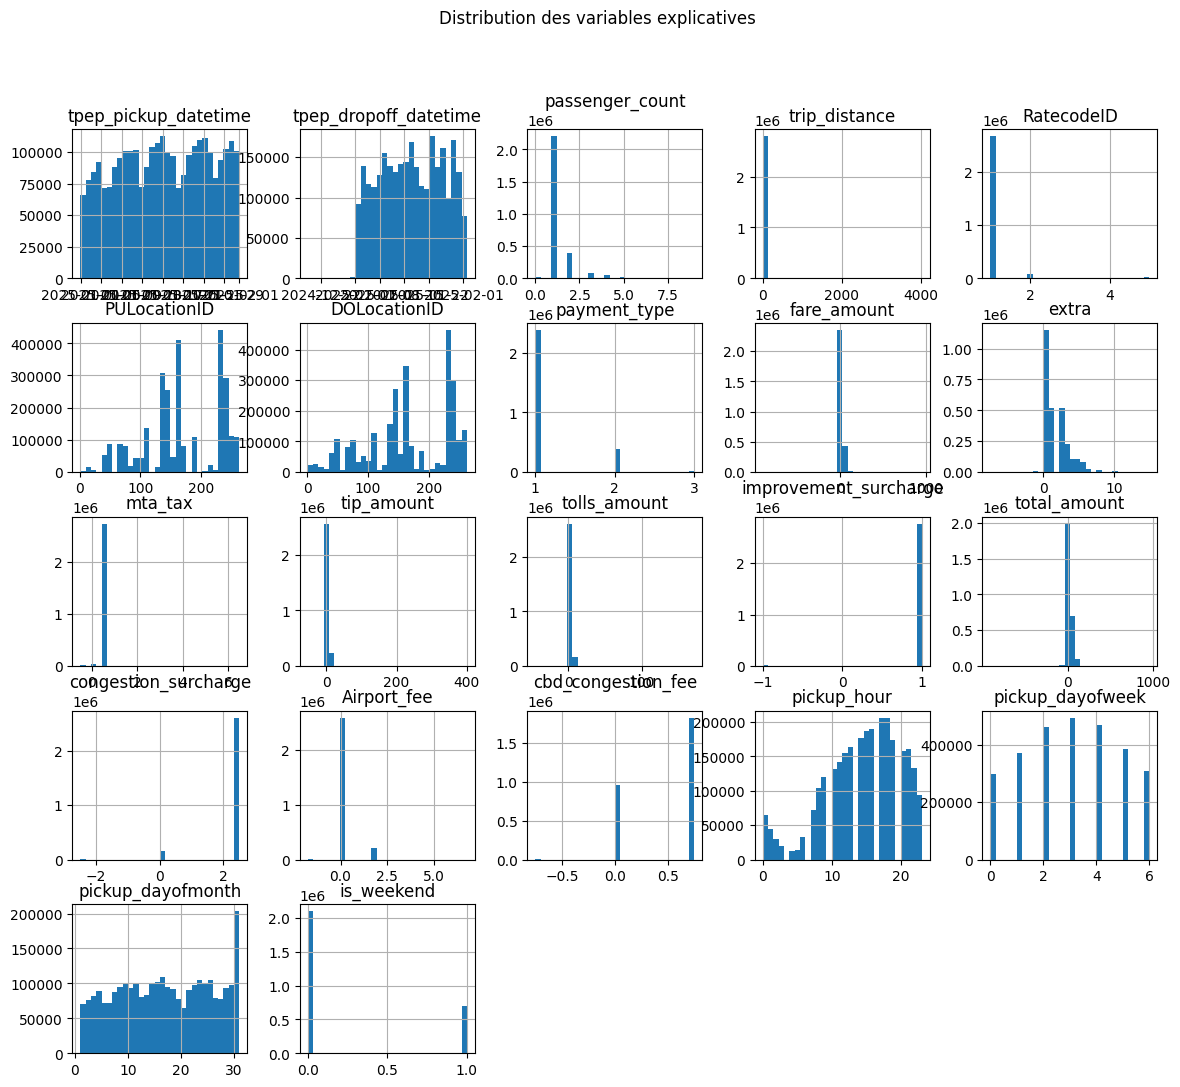

In [101]:
# 4.1 Distributions de toutes les variables explicatives

df.hist(bins=30, figsize=(14,12))
plt.suptitle("Distribution des variables explicatives")
plt.show()

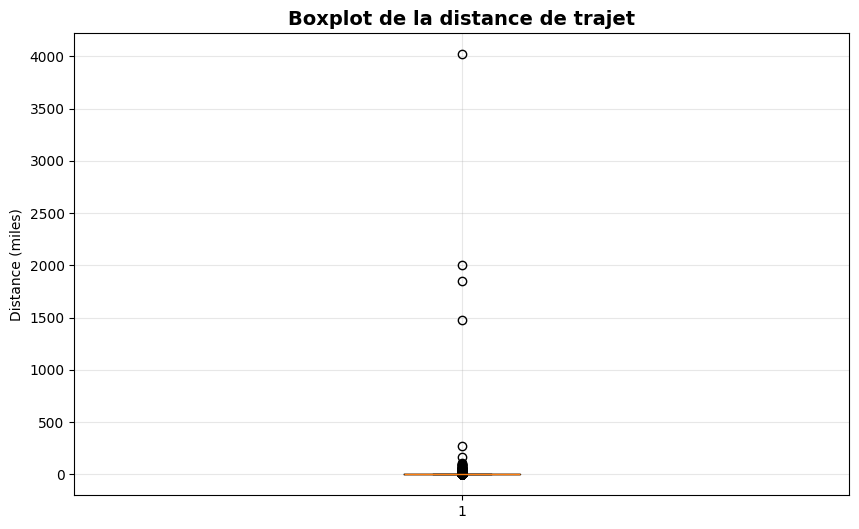

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Correction : Utiliser plt.boxplot() directement
plt.figure(figsize=(10, 6))
plt.boxplot(x=df['trip_distance'].dropna())  # dropna pour éviter les erreurs
plt.title("Boxplot de la distance de trajet", fontsize=14, fontweight='bold')
plt.ylabel('Distance (miles)')
plt.grid(True, alpha=0.3)
plt.show()

<h1>Importation des latitude et longtitudes des zones taxis

In [103]:
import pandas as pd

zones_df=pd.read_csv('/content/taxi_zones.csv')
zones_df.head(5)

,Unnamed: 0,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,x,y
0,0,1,0.116357,0.000782,Newark Airport,1,EWR,-74.174000,40.691831
1,1,2,0.433470,0.004866,Jamaica Bay,2,Queens,-73.831299,40.616745
2,2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,-73.847422,40.864474
3,3,4,0.043567,0.000112,Alphabet City,4,Manhattan,-73.976968,40.723752
4,4,5,0.092146,0.000498,Arden Heights,5,Staten Island,-74.188484,40.552659


In [104]:
zones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    int64  
 1   OBJECTID    263 non-null    int64  
 2   Shape_Leng  263 non-null    float64
 3   Shape_Area  263 non-null    float64
 4   zone        263 non-null    object 
 5   LocationID  263 non-null    int64  
 6   borough     263 non-null    object 
 7   x           263 non-null    float64
 8   y           263 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 18.6+ KB


In [105]:
df.isnull().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0
extra,0


In [106]:
zones_df.isnull().sum()

,0
Unnamed: 0,0
OBJECTID,0
Shape_Leng,0
Shape_Area,0
zone,0
LocationID,0
borough,0
x,0
y,0


In [107]:
df.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,pickup_hour,pickup_dayofweek,pickup_dayofmonth,is_weekend
0,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,229,237,1,10.0,3.5,...,0.0,1.0,18.00,2.5,0.0,0.0,0,2,1,0
1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,236,237,1,5.1,3.5,...,0.0,1.0,12.12,2.5,0.0,0.0,0,2,1,0
2,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,141,141,1,5.1,3.5,...,0.0,1.0,12.10,2.5,0.0,0.0,0,2,1,0
3,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,244,244,2,7.2,1.0,...,0.0,1.0,9.70,0.0,0.0,0.0,0,2,1,0
4,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,244,116,2,5.8,1.0,...,0.0,1.0,8.30,0.0,0.0,0.0,0,2,1,0


In [108]:
# AVEC borough et zone aussi :
def add_all_zone_info(df_trips, df_zones):
    """
    Ajoute toutes les infos de zone (borough, zone, coordonnées)
    """
    # Sélectionner les colonnes nécessaires
    zone_data = df_zones[['LocationID', 'borough', 'zone', 'x', 'y']]

    # Créer des dictionnaires pour chaque information
    borough_dict = dict(zip(zone_data['LocationID'], zone_data['borough']))
    zone_dict = dict(zip(zone_data['LocationID'], zone_data['zone']))
    lon_dict = dict(zip(zone_data['LocationID'], zone_data['x']))  # x = longitude
    lat_dict = dict(zip(zone_data['LocationID'], zone_data['y']))  # y = latitude

    # Ajouter les colonnes PICKUP
    df_trips['PU_Borough'] = df_trips['PULocationID'].map(borough_dict)
    df_trips['PU_Zone'] = df_trips['PULocationID'].map(zone_dict)
    df_trips['PU_longitude'] = df_trips['PULocationID'].map(lon_dict)
    df_trips['PU_latitude'] = df_trips['PULocationID'].map(lat_dict)

    # Ajouter les colonnes DROPOFF
    df_trips['DO_Borough'] = df_trips['DOLocationID'].map(borough_dict)
    df_trips['DO_Zone'] = df_trips['DOLocationID'].map(zone_dict)
    df_trips['DO_longitude'] = df_trips['DOLocationID'].map(lon_dict)
    df_trips['DO_latitude'] = df_trips['DOLocationID'].map(lat_dict)

    print(f"✅ 8 colonnes ajoutées à {len(df_trips):,} trajets")
    print("📍 Nouvelles colonnes:")
    new_cols = ['PU_Borough', 'PU_Zone', 'PU_longitude', 'PU_latitude',
                'DO_Borough', 'DO_Zone', 'DO_longitude', 'DO_latitude']

    for col in new_cols:
        missing = df_trips[col].isnull().sum()
        print(f"   - {col}: {missing:,} manquants")

    return df_trips

# UTILISATION FINALE RECOMMANDÉE :
df = add_all_zone_info(df, zones_df)



✅ 8 colonnes ajoutées à 2,790,211 trajets
📍 Nouvelles colonnes:
   - PU_Borough: 6 manquants
   - PU_Zone: 6 manquants
   - PU_longitude: 6 manquants
   - PU_latitude: 6 manquants
   - DO_Borough: 29 manquants
   - DO_Zone: 29 manquants
   - DO_longitude: 29 manquants
   - DO_latitude: 29 manquants


In [109]:
df.dropna(inplace=True)

In [110]:
df.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,pickup_dayofmonth,is_weekend,PU_Borough,PU_Zone,PU_longitude,PU_latitude,DO_Borough,DO_Zone,DO_longitude,DO_latitude
0,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,229,237,1,10.0,3.5,...,1,0,Manhattan,Sutton Place/Turtle Bay North,-73.965146,40.756729,Manhattan,Upper East Side South,-73.965635,40.768615
1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,236,237,1,5.1,3.5,...,1,0,Manhattan,Upper East Side North,-73.957012,40.780436,Manhattan,Upper East Side South,-73.965635,40.768615
2,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,141,141,1,5.1,3.5,...,1,0,Manhattan,Lenox Hill West,-73.959635,40.766948,Manhattan,Lenox Hill West,-73.959635,40.766948
3,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,244,244,2,7.2,1.0,...,1,0,Manhattan,Washington Heights South,-73.941399,40.841709,Manhattan,Washington Heights South,-73.941399,40.841709
4,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,244,116,2,5.8,1.0,...,1,0,Manhattan,Washington Heights South,-73.941399,40.841709,Manhattan,Hamilton Heights,-73.948522,40.827013


In [111]:
df.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee',
       'pickup_hour', 'pickup_dayofweek', 'pickup_dayofmonth', 'is_weekend',
       'PU_Borough', 'PU_Zone', 'PU_longitude', 'PU_latitude', 'DO_Borough',
       'DO_Zone', 'DO_longitude', 'DO_latitude'],
      dtype='object')

In [112]:
# Créer une colonne booléenne indiquant si des péages ont été payés
df['has_tolls'] = df['tolls_amount'] > 0
df['is_manhattan_pickup'] = df['PU_Borough'].str.lower() == 'manhattan'
df['is_manhattan_dropoff'] = df['DO_Borough'].str.lower() == 'manhattan'
df['is_same_borough'] = df['PU_Borough'] == df['DO_Borough']
 # Nuit = 22h à 6h du matin (inclus)
night_hours = list(range(22, 24)) + list(range(0, 6))  # 22h-5h
df['is_night'] = df['pickup_hour'].isin(night_hours).astype(int)
# Liste des mots-clés pour identifier les aéroports
airport_keywords = ['airport', 'jfk', 'newark', 'laguardia', 'ewr', 'lga']

# Créer une fonction pour vérifier si une zone contient un aéroport
def is_airport_zone(zone_name):
    if pd.isna(zone_name):
        return False
    zone_lower = str(zone_name).lower()
    return any(keyword in zone_lower for keyword in airport_keywords)

# Appliquer la fonction aux colonnes PU_Zone et DO_Zone
df['is_airport_pickup'] = df['PU_Zone'].apply(is_airport_zone)
df['is_airport_dropoff'] = df['DO_Zone'].apply(is_airport_zone)

In [113]:
from math import radians, sin, cos, sqrt, atan2

# Définir la fonction
def h_dist(lon1, lat1, lon2, lat2):
    R=3958.8
    l1,l2,la1,la2=map(radians,[lon1,lon2,lat1,lat2])
    return R*2*atan2(sqrt(sin((la2-la1)/2)**2+cos(la1)*cos(la2)*sin((l2-l1)/2)**2), sqrt(1-(sin((la2-la1)/2)**2+cos(la1)*cos(la2)*sin((l2-l1)/2)**2)))

# Ajouter la colonne
df['distance_pure'] = df.apply(lambda r: h_dist(r['PU_longitude'],r['PU_latitude'],r['DO_longitude'],r['DO_latitude']), axis=1)

In [114]:
df.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee',
       'pickup_hour', 'pickup_dayofweek', 'pickup_dayofmonth', 'is_weekend',
       'PU_Borough', 'PU_Zone', 'PU_longitude', 'PU_latitude', 'DO_Borough',
       'DO_Zone', 'DO_longitude', 'DO_latitude', 'has_tolls',
       'is_manhattan_pickup', 'is_manhattan_dropoff', 'is_same_borough',
       'is_night', 'is_airport_pickup', 'is_airport_dropoff', 'distance_pure'],
      dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2790180 entries, 0 to 2935076
Data columns (total 38 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[us]
 1   tpep_dropoff_datetime  datetime64[us]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int32         
 6   DOLocationID           int32         
 7   payment_type           int64         
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  congestion_surcharge   float64       
 16  Airport_fee            float64       
 17  cbd_congestion_fee     float64       
 18  pickup_hour            int3

In [116]:
df.shape

(2790180, 38)

In [117]:
import pandas as pd

def add_duration_columns(df):
    """
    Ajoute les colonnes de durée à partir des timestamps
    """
    print("⏱️  Calcul des durées de trajet...")



    # 1. Durée totale en minutes (la plus utile)
    df['trip_duration_minutes'] = (
        df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    ).dt.total_seconds() / 60

    # 2. Durée en secondes (pour plus de précision)
    df['trip_duration_seconds'] = (
        df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    ).dt.total_seconds()

    # 3. Durée arrondie (pour certains modèles)
    df['trip_duration_rounded_min'] = df['trip_duration_minutes'].round()

    # 4. Log de la durée (utile si distribution asymétrique)
    df['log_trip_duration'] = np.log1p(df['trip_duration_minutes'])





    return df

# Utilisation
df = add_duration_columns(df)

⏱️  Calcul des durées de trajet...


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [118]:
df.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,is_manhattan_dropoff,is_same_borough,is_night,is_airport_pickup,is_airport_dropoff,distance_pure,trip_duration_minutes,trip_duration_seconds,trip_duration_rounded_min,log_trip_duration
0,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,229,237,1,10.0,3.5,...,True,True,1,False,False,0.821667,8.350000,501.0,8.0,2.235376
1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,236,237,1,5.1,3.5,...,True,True,1,False,False,0.933109,2.550000,153.0,3.0,1.266948
2,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,141,141,1,5.1,3.5,...,True,True,1,False,False,0.000000,1.950000,117.0,2.0,1.081805
3,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,244,244,2,7.2,1.0,...,True,True,1,False,False,0.000000,5.566667,334.0,6.0,1.882006
4,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,244,116,2,5.8,1.0,...,True,True,1,False,False,1.081531,3.533333,212.0,4.0,1.511458


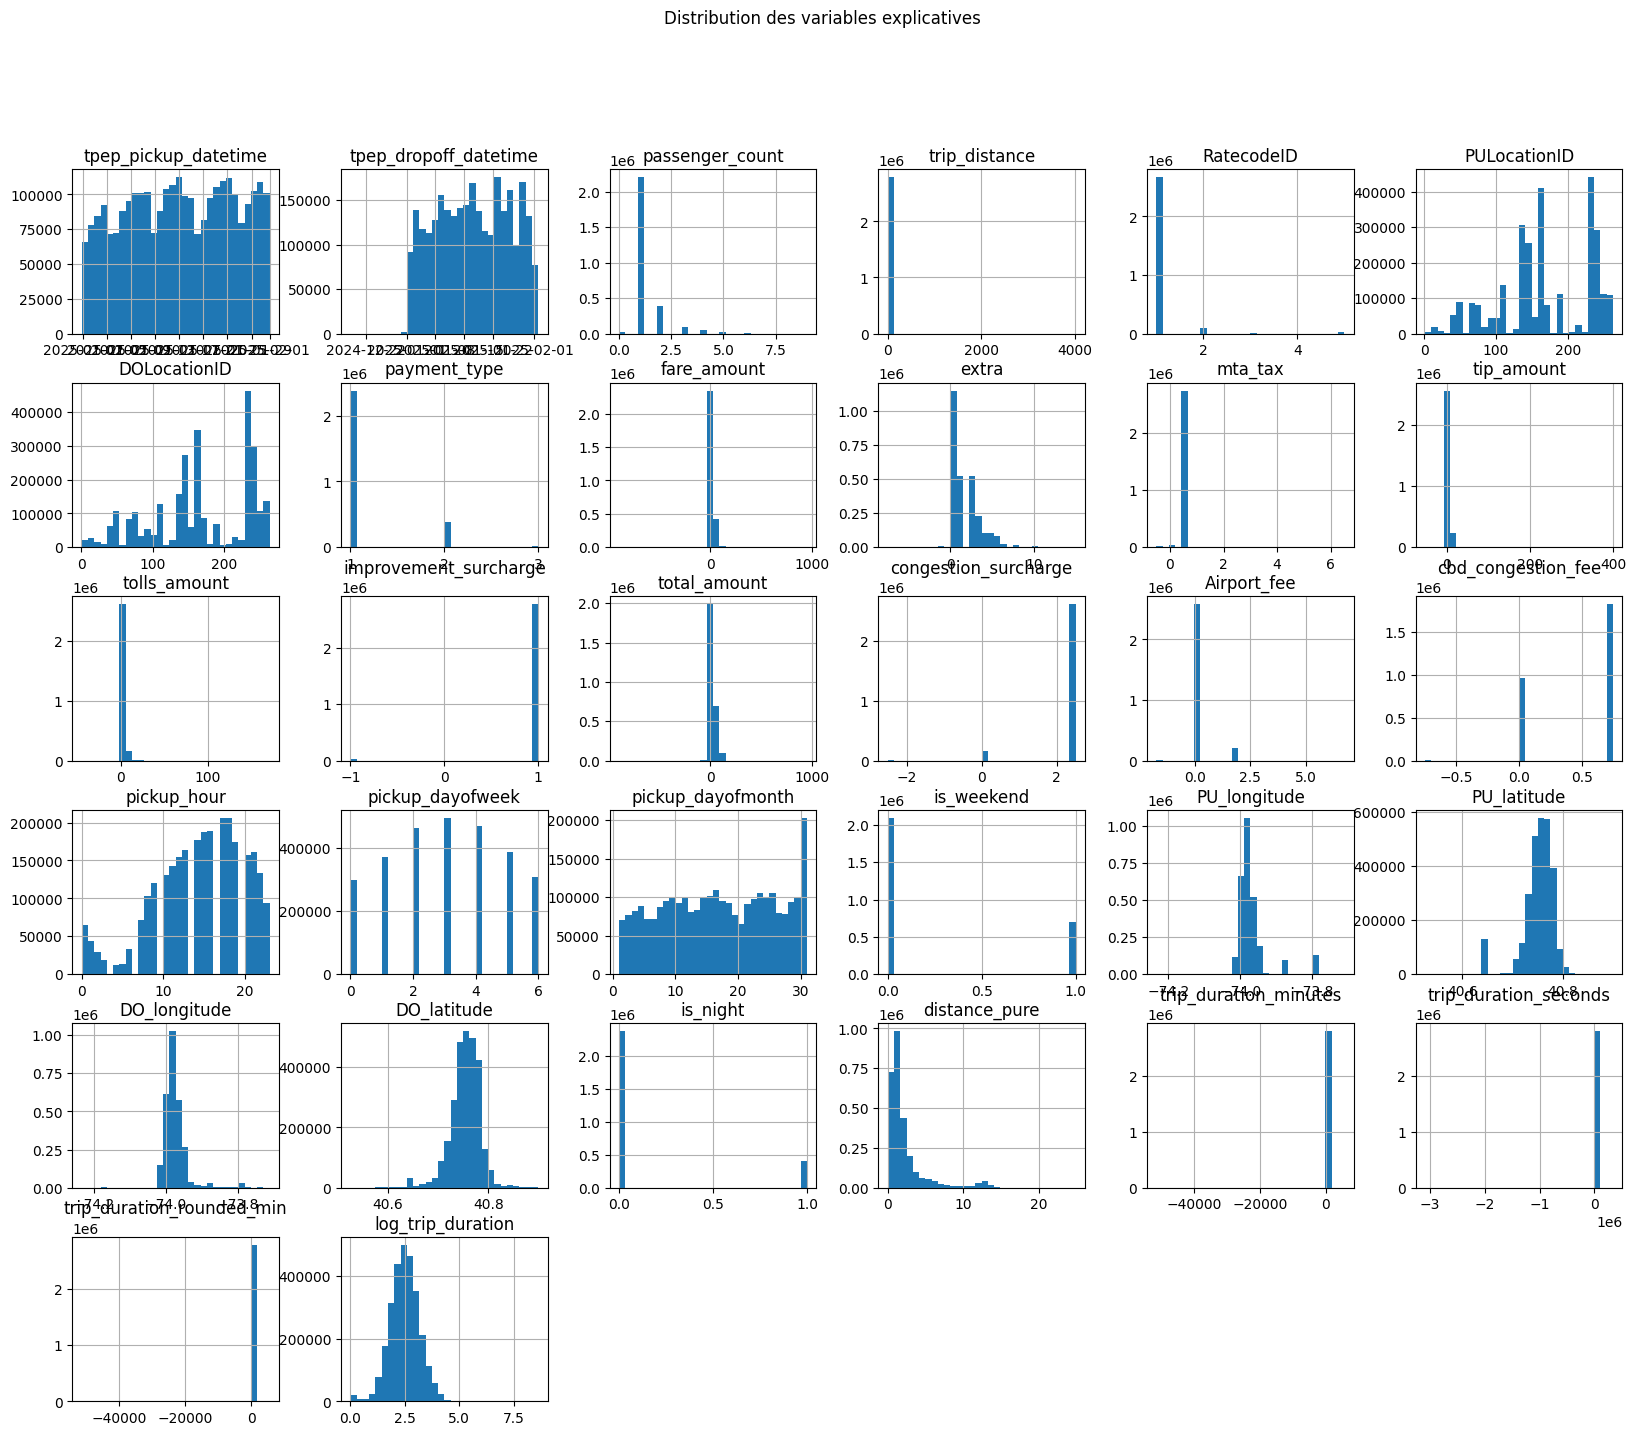

In [119]:
# 4.1 Distributions de toutes les variables explicatives

df.hist(bins=30, figsize=(20,16))
plt.suptitle("Distribution des variables explicatives")
plt.show()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2790180 entries, 0 to 2935076
Data columns (total 42 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   tpep_pickup_datetime       datetime64[us]
 1   tpep_dropoff_datetime      datetime64[us]
 2   passenger_count            float64       
 3   trip_distance              float64       
 4   RatecodeID                 float64       
 5   PULocationID               int32         
 6   DOLocationID               int32         
 7   payment_type               int64         
 8   fare_amount                float64       
 9   extra                      float64       
 10  mta_tax                    float64       
 11  tip_amount                 float64       
 12  tolls_amount               float64       
 13  improvement_surcharge      float64       
 14  total_amount               float64       
 15  congestion_surcharge       float64       
 16  Airport_fee                float64       

In [121]:

# Récupération des features finales
features_fe = [c for c in df.columns if c not in [ "PU_Borough",  "PU_Zone" , "DO_Borough" ,"DO_Zone"]]

# Matrice de corrélation complète
corr_matrix = df[features_fe].corr()

# Affichage trié par corrélation absolue avec la cible
corr_target = corr_matrix["fare_amount"].sort_values(ascending=False)

print("Corrélation des features avec la cible log (triées):\n")
print(corr_target)



Corrélation des features avec la cible log (triées):

fare_amount                  1.000000
total_amount                 0.979077
distance_pure                0.844017
trip_distance                0.696208
log_trip_duration            0.645107
tip_amount                   0.633249
tolls_amount                 0.623661
has_tolls                    0.618711
Airport_fee                  0.613673
is_airport_pickup            0.601472
PU_longitude                 0.580716
RatecodeID                   0.493050
is_airport_dropoff           0.355764
DO_longitude                 0.204865
trip_duration_minutes        0.204160
trip_duration_seconds        0.204160
trip_duration_rounded_min    0.204141
improvement_surcharge        0.203591
extra                        0.160592
passenger_count              0.056035
is_night                     0.023548
mta_tax                      0.020176
pickup_hour                  0.001768
cbd_congestion_fee          -0.001196
pickup_dayofweek            -0.004

/tmp/ipython-input-3358968765.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(high_corr_features.values()), y=list(high_corr_features.keys()), palette="viridis")


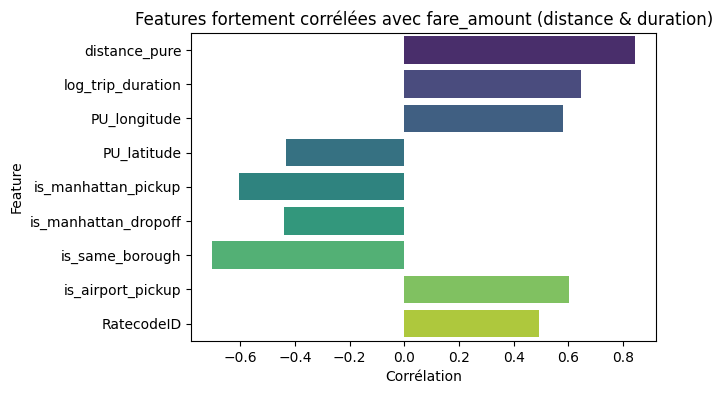

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Corrélations filtrées (comme on a sélectionné)
correlations = {
    'distance_pure': 0.844017,
    'log_trip_duration': 0.645107,
    'PU_longitude': 0.580716,
    'PU_latitude': -0.433311,
    'is_manhattan_pickup': -0.603468,
    'is_manhattan_dropoff': -0.440636,
    'is_same_borough': -0.703043,
    'is_airport_pickup'  :          0.601472,
'RatecodeID'       :            0.493050,

}

# Seuil de corrélation pour ne garder que les fortes corrélations
threshold = 0.2
high_corr_features = {k:v for k,v in correlations.items() if abs(v) > threshold}

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=list(high_corr_features.values()), y=list(high_corr_features.keys()), palette="viridis")
plt.title("Features fortement corrélées avec fare_amount (distance & duration)")
plt.xlabel("Corrélation")
plt.ylabel("Feature")
plt.show()


/tmp/ipython-input-1296730998.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_corr_features.values, y=high_corr_features.index, palette="viridis")


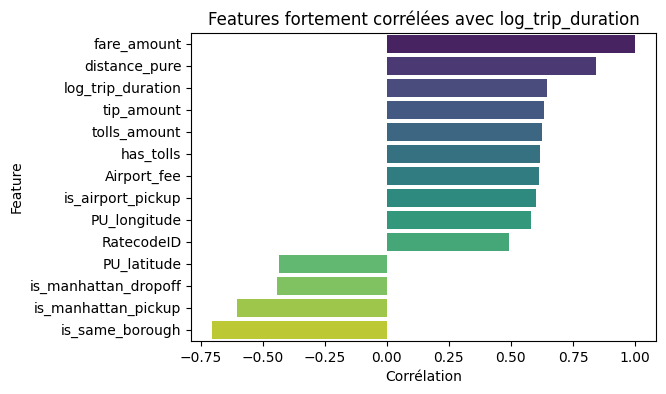

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seuil de corrélation
threshold = 0.4

# Corrélation triée avec la cible
corr_target = corr_matrix["fare_amount"].sort_values(ascending=False)

# Colonnes à ignorer
exclude_cols = ["trip_duration_minutes", "trip_duration_seconds", "total_amount", "trip_distance"]

# Sélection des features à forte corrélation et non exclues
high_corr_features = corr_target[abs(corr_target) > threshold].drop(exclude_cols, errors='ignore')

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=high_corr_features.values, y=high_corr_features.index, palette="viridis")
plt.title("Features fortement corrélées avec log_trip_duration")
plt.xlabel("Corrélation")
plt.ylabel("Feature")
plt.show()


In [124]:
df.dropna(inplace=True)

In [125]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
tpep_pickup_datetime,2790179,2025-01-17 02:31:07.040907,2024-12-31 20:47:55,2025-01-09 16:32:23.500000,2025-01-16 21:10:52,2025-01-24 17:32:43,2025-02-01 00:00:44,NaN
tpep_dropoff_datetime,2790179,2025-01-17 02:45:35.404590,2024-12-31 20:54:00,2025-01-09 16:48:35,2025-01-16 21:24:17,2025-01-24 17:48:01.500000,2025-02-01 23:44:11,NaN
passenger_count,2790179.0,1.300074,0.0,1.0,1.0,1.0,9.0,0.753952
trip_distance,2790179.0,3.01302,0.0,0.96,1.6,2.88,4020.04,5.061918
RatecodeID,2790179.0,1.068897,1.0,1.0,1.0,1.0,5.0,0.403881
PULocationID,2790179.0,167.446963,1.0,132.0,162.0,234.0,263.0,62.521762
DOLocationID,2790179.0,165.978643,1.0,125.0,162.0,234.0,263.0,68.29512
payment_type,2790179.0,1.154731,1.0,1.0,1.0,1.0,3.0,0.384074
fare_amount,2790179.0,17.159926,-900.0,8.6,12.1,18.4,950.0,16.444809
extra,2790179.0,1.605906,-7.5,0.0,1.0,2.5,15.0,1.914431


In [126]:
df_cleaned=df.copy()

In [127]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2790179 entries, 0 to 2935076
Data columns (total 42 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   tpep_pickup_datetime       datetime64[us]
 1   tpep_dropoff_datetime      datetime64[us]
 2   passenger_count            float64       
 3   trip_distance              float64       
 4   RatecodeID                 float64       
 5   PULocationID               int32         
 6   DOLocationID               int32         
 7   payment_type               int64         
 8   fare_amount                float64       
 9   extra                      float64       
 10  mta_tax                    float64       
 11  tip_amount                 float64       
 12  tolls_amount               float64       
 13  improvement_surcharge      float64       
 14  total_amount               float64       
 15  congestion_surcharge       float64       
 16  Airport_fee                float64       

<h1>Traitement des outliers

Mx Nbre **des passagers**

In [128]:

df_cleaned= df_cleaned[(df_cleaned['passenger_count'] > 0) & (df_cleaned['passenger_count'] <= 4)]

In [129]:
df_cleaned.drop(columns=["trip_duration_rounded_min"], inplace=True)

In [130]:
cols = [
    "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount",
    "improvement_surcharge", "total_amount", "congestion_surcharge",
    "Airport_fee", "cbd_congestion_fee"
]

# Garder seulement les lignes où toutes les valeurs sont >= 0
df_cleaned = df_cleaned[df_cleaned[cols].ge(0).all(axis=1)]

In [131]:
df_cleaned= df_cleaned[(df_cleaned['improvement_surcharge'] == 1) &(df_cleaned['mta_tax'] == 0.5) ]

In [132]:
df_cleaned.shape

(2687692, 41)

In [133]:
df_cleaned = df_cleaned[(df_cleaned['trip_duration_minutes'] >= 1) & (df_cleaned['trip_duration_minutes'] <= 120)]


In [134]:
df_cleaned = df_cleaned[(df_cleaned['distance_pure'] > 0)]


In [135]:
df_cleaned.shape

(2554866, 41)

In [136]:
cols = [
    "fare_amount","extra","tip_amount","tolls_amount","distance_pure","trip_duration_minutes","trip_duration_seconds","log_trip_duration",
   "total_amount"
]

outliers = {}

for col in cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (df_cleaned[col] > lower) | (df_cleaned[col] < upper)
    df_cleaned= df_cleaned[mask]




In [137]:
df_cleaned.describe().T

,count,mean,min,25%,50%,75%,max,std
tpep_pickup_datetime,166067,2025-01-16 12:15:12.742224,2025-01-01 00:01:28,2025-01-08 18:36:34.500000,2025-01-16 11:40:52,2025-01-24 00:12:50,2025-01-31 23:59:51,NaN
tpep_dropoff_datetime,166067,2025-01-16 12:50:10.448313,2025-01-01 00:16:17,2025-01-08 19:10:48.500000,2025-01-16 12:14:39,2025-01-24 00:41:42.500000,2025-02-01 00:33:22,NaN
passenger_count,166067.0,1.353165,1.0,1.0,1.0,2.0,4.0,0.670661
trip_distance,166067.0,13.452821,0.0,9.28,11.82,17.76,108.9,5.096317
RatecodeID,166067.0,1.417855,1.0,1.0,1.0,2.0,5.0,0.507896
PULocationID,166067.0,143.286938,2.0,132.0,138.0,138.0,263.0,40.865722
DOLocationID,166067.0,157.379889,1.0,132.0,145.0,230.0,263.0,63.483917
payment_type,166067.0,1.11794,1.0,1.0,1.0,1.0,3.0,0.333263
fare_amount,166067.0,54.16809,3.0,39.4,52.0,70.0,411.8,16.588227
extra,166067.0,3.771904,0.0,0.0,5.0,5.0,14.25,3.245499


In [138]:

# Récupération des features finales
features_fe = [c for c in df_cleaned.columns if c not in [ "PU_Borough",  "PU_Zone" , "DO_Borough" ,"DO_Zone"]]

# Matrice de corrélation complète
corr_matrix = df_cleaned[features_fe].corr()

# Affichage trié par corrélation absolue avec la cible
corr_target = corr_matrix["fare_amount"].sort_values(ascending=False)

print("Corrélation des features avec la cible log (triées):\n")
print(corr_target)



Corrélation des features avec la cible log (triées):

fare_amount              1.000000
trip_distance            0.919400
total_amount             0.917688
distance_pure            0.907485
RatecodeID               0.788672
log_trip_duration        0.773001
trip_duration_seconds    0.737504
trip_duration_minutes    0.737504
PU_longitude             0.495799
tip_amount               0.247013
is_airport_pickup        0.216554
passenger_count          0.144330
tolls_amount             0.118826
Airport_fee              0.109457
is_manhattan_dropoff     0.097245
payment_type             0.084841
DO_longitude             0.069002
is_airport_dropoff       0.034255
cbd_congestion_fee       0.022679
is_weekend               0.013373
pickup_dayofweek         0.010659
pickup_hour             -0.016174
DOLocationID            -0.034345
congestion_surcharge    -0.035659
is_night                -0.041686
tpep_dropoff_datetime   -0.046248
pickup_dayofmonth       -0.046694
tpep_pickup_datetime    -0.0

/tmp/ipython-input-165065662.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_corr_features.values, y=high_corr_features.index, palette="viridis")


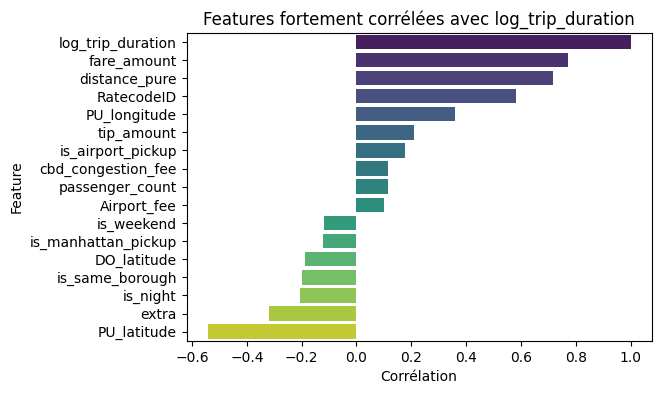

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seuil de corrélation
threshold = 0.1

# Corrélation triée avec la cible
corr_target = corr_matrix["log_trip_duration"].sort_values(ascending=False)

# Colonnes à ignorer
exclude_cols = ["trip_duration_minutes", "trip_duration_seconds", "total_amount", "trip_distance"]

# Sélection des features à forte corrélation et non exclues
high_corr_features = corr_target[abs(corr_target) > threshold].drop(exclude_cols, errors='ignore')

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=high_corr_features.values, y=high_corr_features.index, palette="viridis")
plt.title("Features fortement corrélées avec log_trip_duration")
plt.xlabel("Corrélation")
plt.ylabel("Feature")
plt.show()


In [140]:
df_cleaned.shape

(166067, 41)

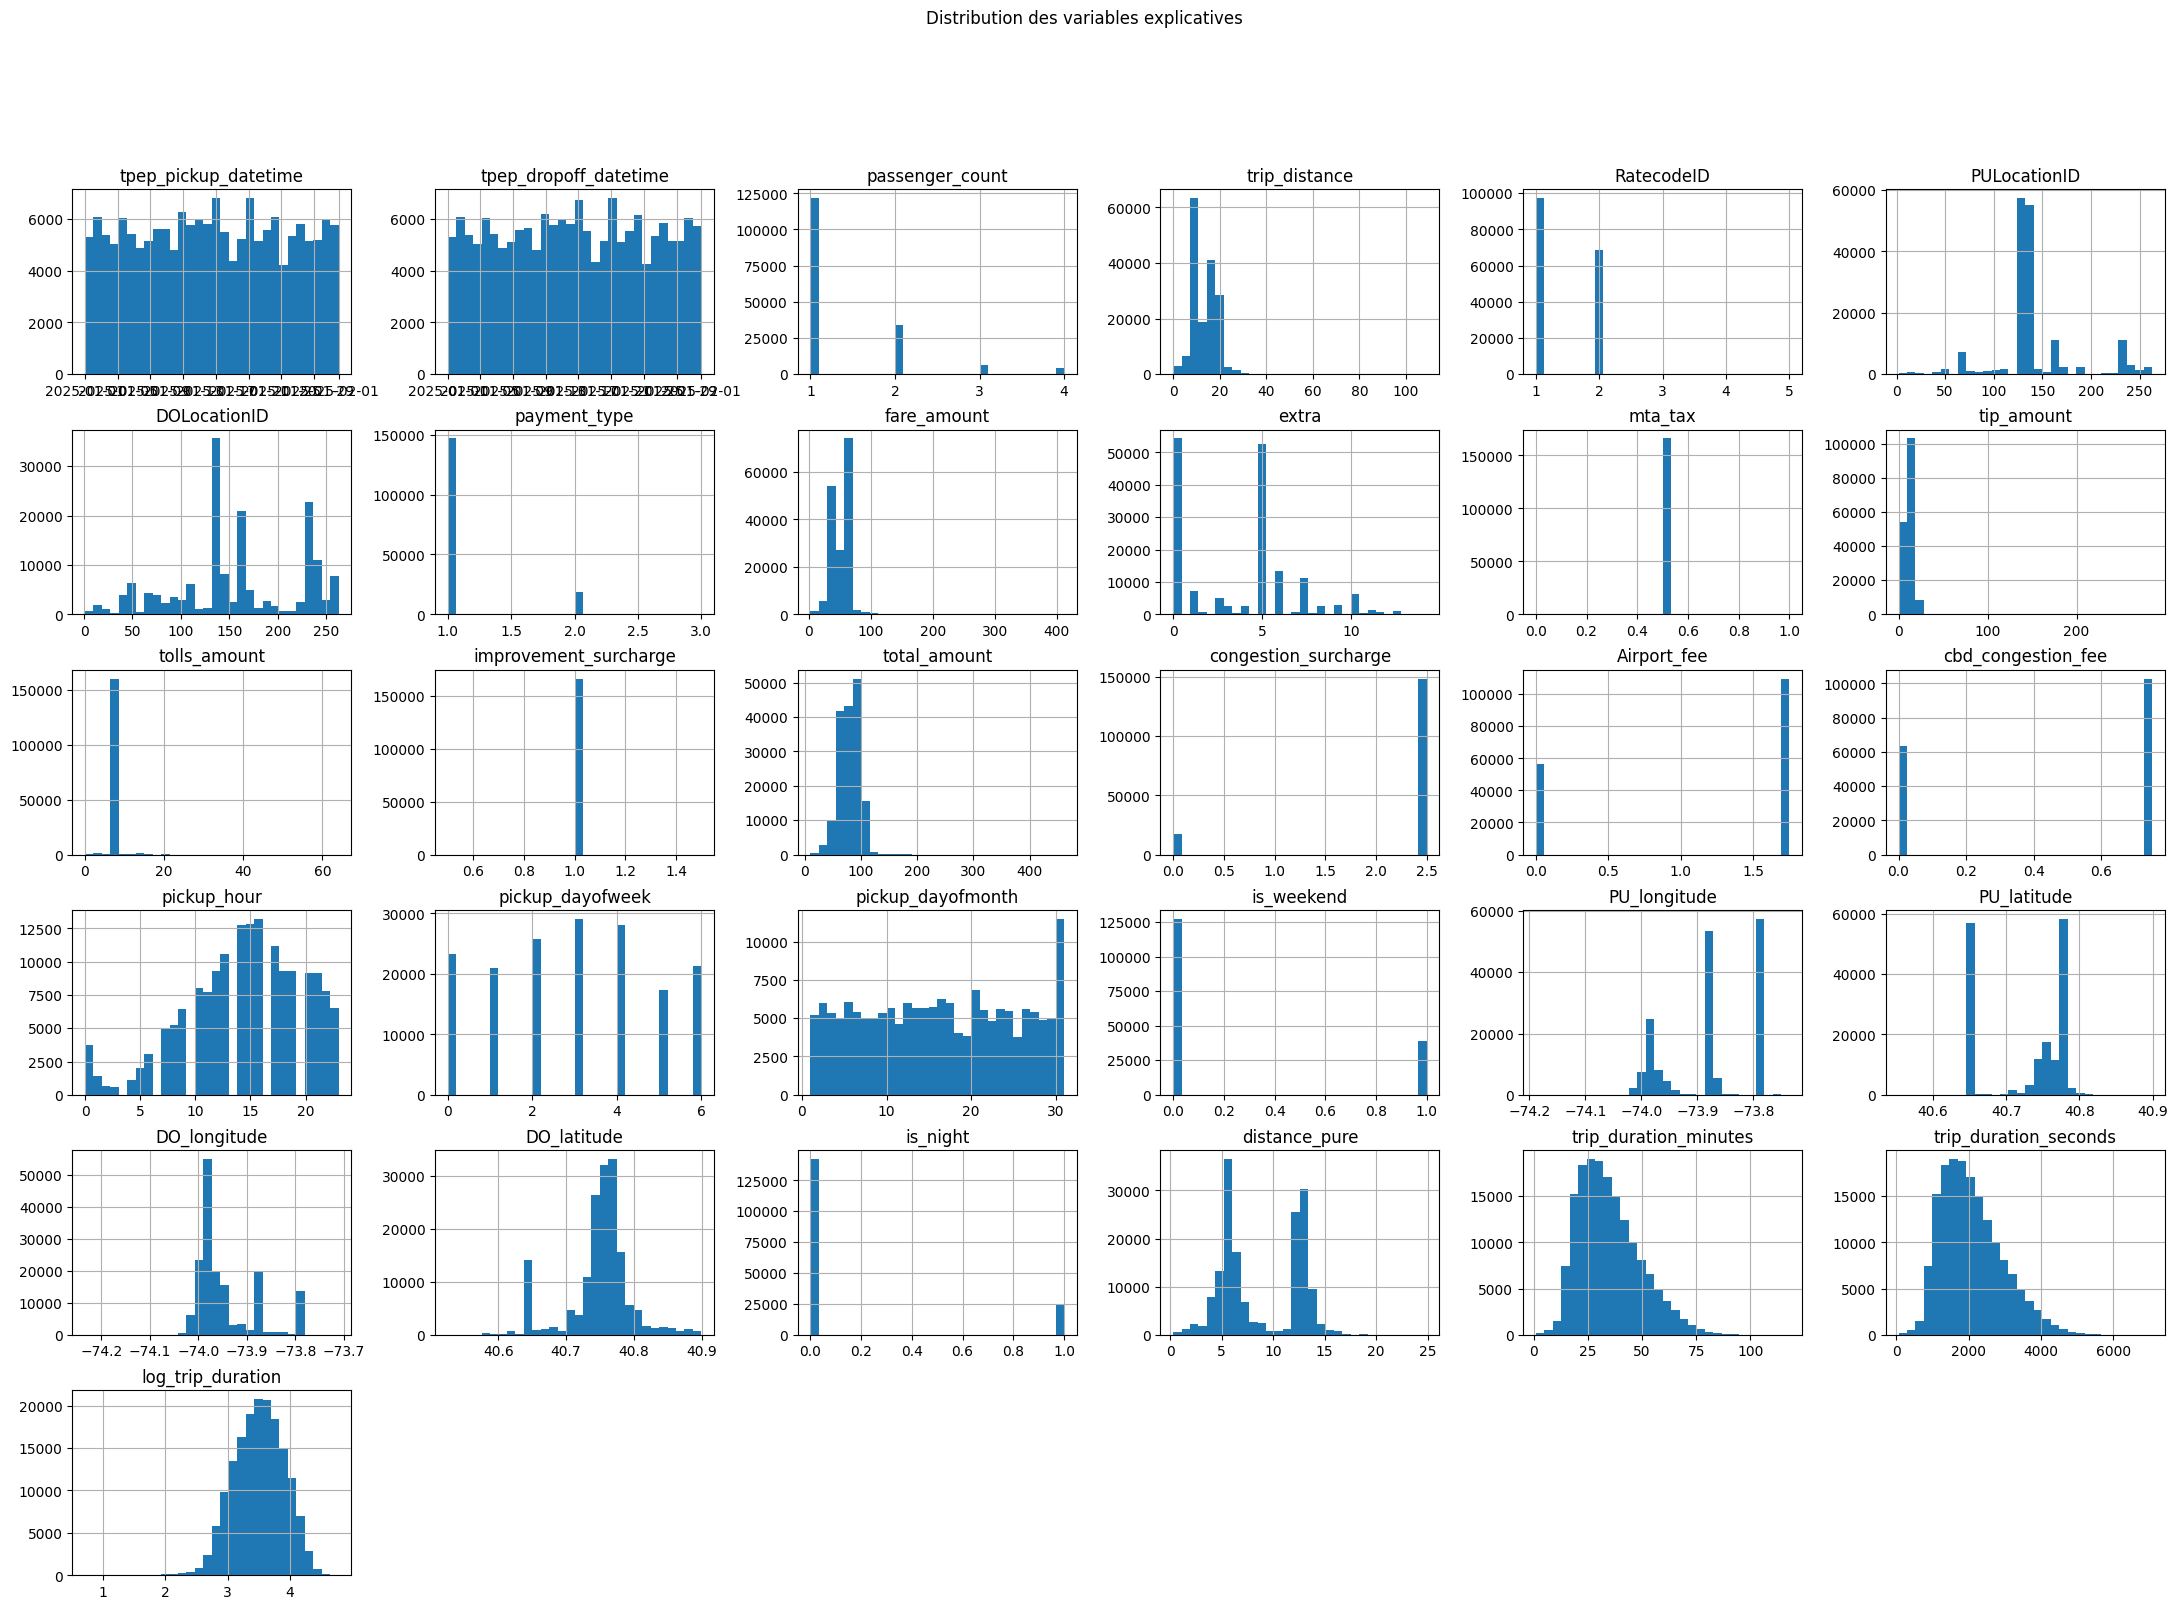

In [141]:
# 4.1 Distributions de toutes les variables explicatives

df_cleaned.hist(bins=30, figsize=(27,18))
plt.suptitle("Distribution des variables explicatives")
plt.show()

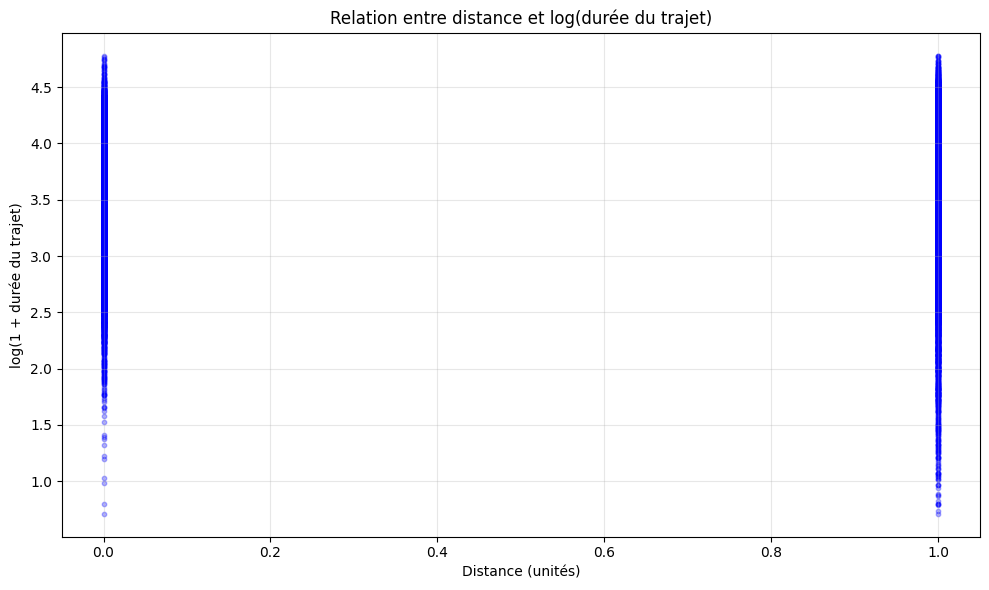

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["is_manhattan_dropoff"], df_cleaned["log_trip_duration"],
            alpha=0.3, s=10, color='blue')
plt.title("Relation entre distance et log(durée du trajet)")
plt.xlabel("Distance (unités)")
plt.ylabel("log(1 + durée du trajet)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

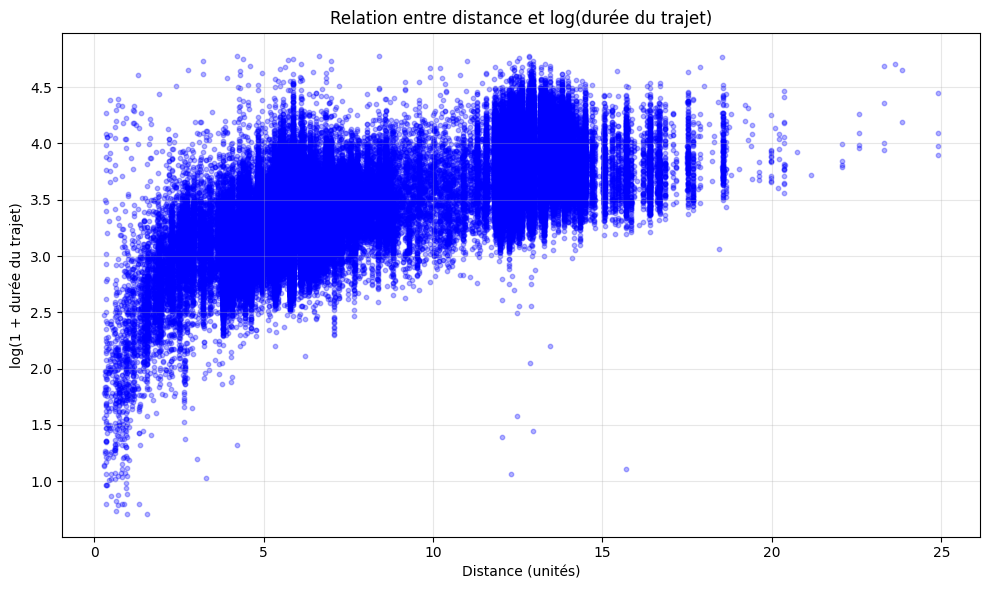

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["distance_pure"], df_cleaned["log_trip_duration"],
            alpha=0.3, s=10, color='blue')
plt.title("Relation entre distance et log(durée du trajet)")
plt.xlabel("Distance (unités)")
plt.ylabel("log(1 + durée du trajet)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

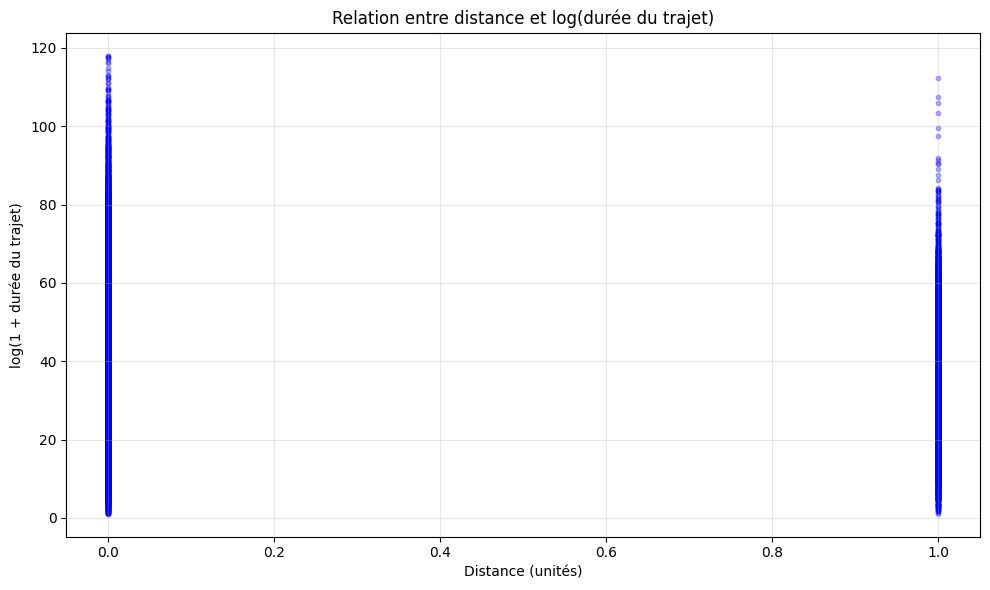

In [144]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["is_weekend"], df_cleaned["trip_duration_minutes"],
            alpha=0.3, s=10, color='blue')
plt.title("Relation entre distance et log(durée du trajet)")
plt.xlabel("Distance (unités)")
plt.ylabel("log(1 + durée du trajet)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

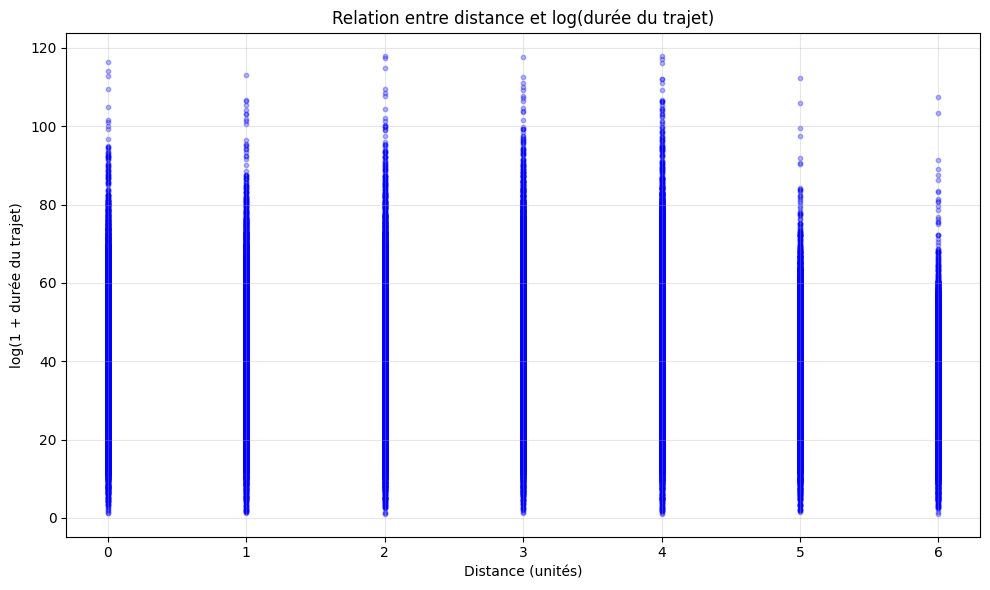

In [145]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["pickup_dayofweek"], df_cleaned["trip_duration_minutes"],
            alpha=0.3, s=10, color='blue')
plt.title("Relation entre distance et log(durée du trajet)")
plt.xlabel("Distance (unités)")
plt.ylabel("log(1 + durée du trajet)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

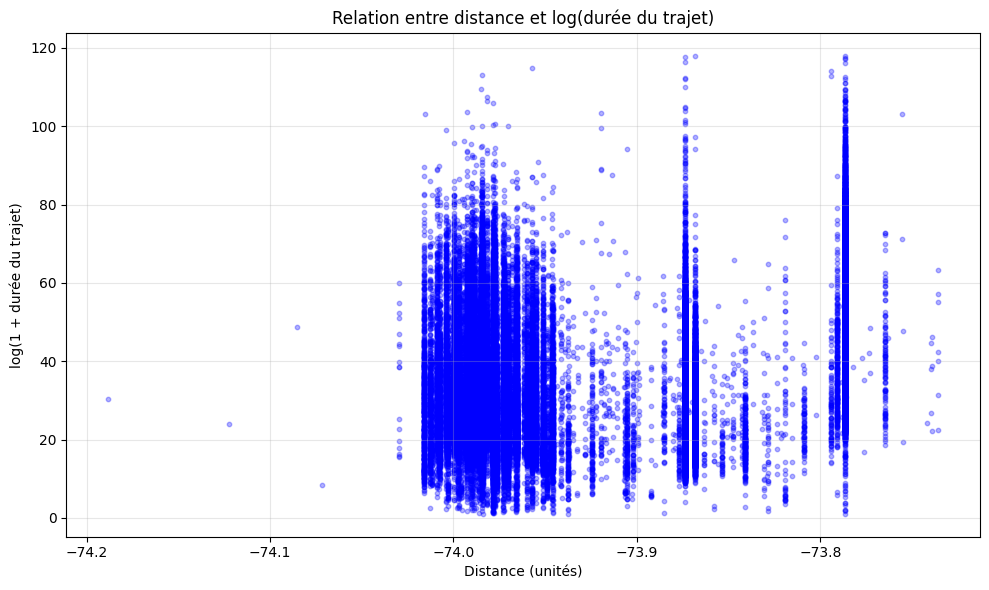

In [146]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["PU_longitude"], df_cleaned["trip_duration_minutes"],
            alpha=0.3, s=10, color='blue')
plt.title("Relation entre distance et log(durée du trajet)")
plt.xlabel("Distance (unités)")
plt.ylabel("log(1 + durée du trajet)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [147]:
df_cleaned.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee',
       'pickup_hour', 'pickup_dayofweek', 'pickup_dayofmonth', 'is_weekend',
       'PU_Borough', 'PU_Zone', 'PU_longitude', 'PU_latitude', 'DO_Borough',
       'DO_Zone', 'DO_longitude', 'DO_latitude', 'has_tolls',
       'is_manhattan_pickup', 'is_manhattan_dropoff', 'is_same_borough',
       'is_night', 'is_airport_pickup', 'is_airport_dropoff', 'distance_pure',
       'trip_duration_minutes', 'trip_duration_seconds', 'log_trip_duration'],
      dtype='object')

<h1>classiication de peack</h1>


In [148]:
def is_peak_hour(hour):
    return 1 if 7 <= hour <= 10 or 16 <= hour <= 19 else 0

df_cleaned['is_peak'] = df_cleaned['pickup_hour'].apply(is_peak_hour)


In [149]:
allowed_features = [
    'pickup_hour', 'pickup_dayofweek', 'pickup_dayofmonth', 'is_weekend',
    'is_night',
    'PU_longitude', 'PU_latitude', 'DO_longitude', 'DO_latitude',
    'PULocationID', 'DOLocationID',
    'PU_Borough', 'PU_Zone', 'DO_Borough', 'DO_Zone',
    'is_manhattan_pickup', 'is_manhattan_dropoff', 'is_same_borough',
    'is_airport_pickup', 'is_airport_dropoff',
    'distance_pure',
    'passenger_count'
]


In [150]:
X = df_cleaned[allowed_features]
y = df_cleaned['is_peak']   # ta variable cible


In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [152]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    'pickup_hour', 'pickup_dayofweek', 'pickup_dayofmonth',
    'PU_longitude', 'PU_latitude', 'DO_longitude', 'DO_latitude',
    'distance_pure', 'passenger_count'
]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])  # fit+transform train
X_test[num_cols] = scaler.transform(X_test[num_cols])        # transform SEULEMENT


In [153]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Séparation X / y
X = df_cleaned[allowed_features]
y = df_cleaned['is_peak']

# Colonnes numériques / catégorielles
num_cols = [
    'pickup_hour','pickup_dayofweek','pickup_dayofmonth',
    'PU_longitude','PU_latitude','DO_longitude','DO_latitude',
    'distance_pure','passenger_count'
]

cat_cols = [
    'PULocationID','DOLocationID',
    'PU_Borough','PU_Zone','DO_Borough','DO_Zone',
    'is_manhattan_pickup','is_manhattan_dropoff',
    'is_same_borough','is_airport_pickup','is_airport_dropoff',
    'is_weekend','is_night'
]

# Préprocesseur sans fuite de données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Pipeline complet
modelClassification = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('rf', RandomForestClassifier(
    n_estimators=350,
    max_depth=20,
    class_weight="balanced"
)
)
])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Entraînement SANS fuite
modelClassification.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pickup_hour',
                                                   'pickup_dayofweek',
                                                   'pickup_dayofmonth',
                                                   'PU_longitude',
                                                   'PU_latitude',
                                                   'DO_longitude',
                                                   'DO_latitude',
                                                   'distance_pure',
                                                   'passenger_count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PULocationID',
                                                   'DOLocationID', 'PU_Borough',
                                                   'PU_Zone', 'DO_Borough',
                                                   'DO_Zone',
                                                   'is_manhattan_pickup',
                                                   'is_manhattan_dropoff',
                                                   'is_same_borough',
                                                   'is_airport_pickup',
                                                   'is_airport_dropoff',
                                                   'is_weekend',
                                                   'is_night'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        n_estimators=350))])

In [154]:
import joblib
joblib.dump(modelClassification, 'peak_classification_model.pkl')


['peak_classification_model.pkl']

In [155]:
from sklearn.metrics import classification_report

y_pred = modelClassification.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.78      0.87     19675
           1       0.76      0.99      0.86     13539

    accuracy                           0.87     33214
   macro avg       0.88      0.89      0.87     33214
weighted avg       0.90      0.87      0.87     33214



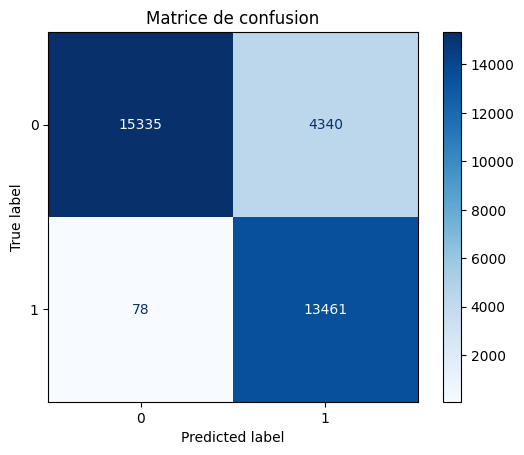

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Matrice de confusion")
plt.show()


In [157]:
print(cm)

[[15335  4340]
 [   78 13461]]


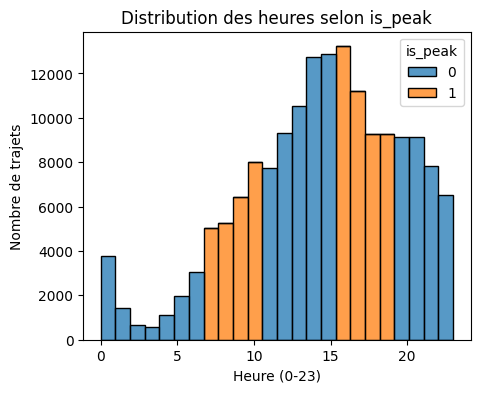

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.histplot(data=df_cleaned, x='pickup_hour', hue='is_peak', multiple='stack', bins=24)
plt.title('Distribution des heures selon is_peak')
plt.xlabel('Heure (0-23)')
plt.ylabel('Nombre de trajets')
plt.show()


🚀 COMPARAISON DES MODÈLES AVANT ET APRÈS OPTIMISATION
📊 Dimensions des données:
  Train: (132853, 10)
  Test: (33214, 10)

🤖 MODÈLES INITIAUX

⏳ ÉVALUATION DES MODÈLES AVANT OPTIMISATION...

🔍 Évaluation de Random Forest...
   R² Train: 0.8273
   R² Test:  0.7864
   Gap:      0.0409
   RMSE:     7.3 min

🔍 Évaluation de Linear Regression...
   R² Train: 0.5907
   R² Test:  0.5872
   Gap:      0.0035
   RMSE:     9.9 min

🔍 Évaluation de LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 980
[LightGBM] [Info] Number of data points in the train set: 132853, number of used features: 10
[LightGBM] [Info] Start training from score 3.501924
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
   R² Train: 0.7988
   R² Test:  0.7901
   Gap:      0.

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


   ✓ Temps optimisation: 375.9s
   Meilleurs paramètres: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
   R² Train: 0.8423
   R² Test:  0.7908
   Amélioration R² Test: 0.0044

🔧 Optimisation de Linear Regression...
   ✓ Linear Regression n'a pas d'hyperparamètres significatifs à optimiser
   R² Train: 0.5907
   R² Test:  0.5872

🔧 Optimisation de LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 980
[LightGBM] [Info] Number of data points in the train set: 132853, number of used features: 10
[LightGBM] [Info] Start training from score 3.501924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 980
[LightGBM] [Info] Number of data poi

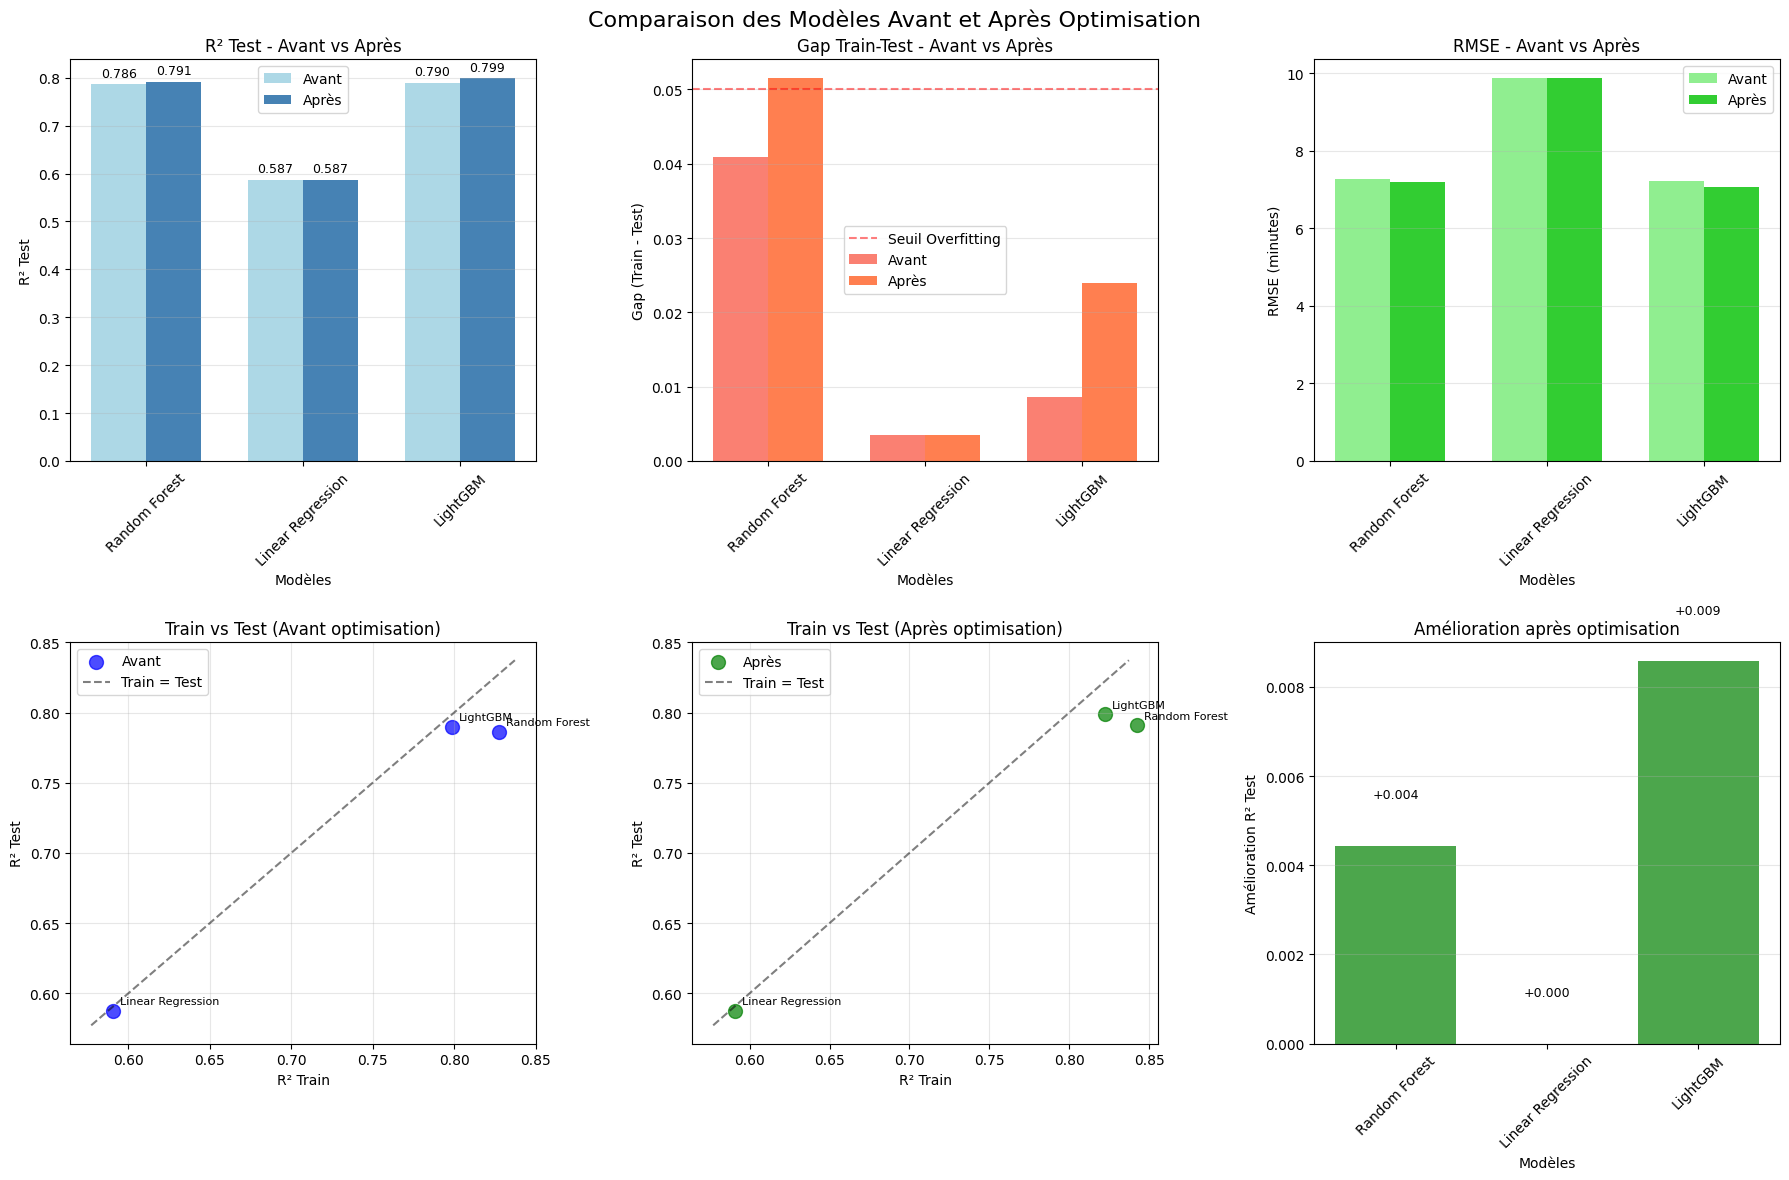


🎯 RÉSUMÉ DES AMÉLIORATIONS

📈 Random Forest:
   R² Test: 0.7864 → 0.7908 (+0.0044)
   Gap: 0.0409 → 0.0515 (+0.0106)
   ✅ Amélioration de la performance
   ⚠️ Augmentation de l'overfitting

📈 Linear Regression:
   R² Test: 0.5872 → 0.5872 (+0.0000)
   Gap: 0.0035 → 0.0035 (+0.0000)
   ⚠️ Pas d'amélioration significative

📈 LightGBM:
   R² Test: 0.7901 → 0.7987 (+0.0086)
   Gap: 0.0087 → 0.0239 (+0.0153)
   ✅ Amélioration de la performance
   ⚠️ Augmentation de l'overfitting

💾 SAUVEGARDE DES MODÈLES OPTIMISÉS

🏆 Meilleur modèle: LightGBM
   R² Test: 0.7987
   RMSE: 7.1 minutes
   ✓ Modèle sauvegardé: 'meilleur_modele_optimise.pkl'
   ✓ Random Forest: 'modele_optimise_random_forest.pkl'
   ✓ Linear Regression: 'modele_optimise_linear_regression.pkl'
   ✓ LightGBM: 'modele_optimise_lightgbm.pkl'

✅ Comparaison terminée!


In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  # Ajouté
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time
import joblib

# ====================
# 1. PRÉPARATION DES DONNÉES
# ====================

print("🚀 COMPARAISON DES MODÈLES AVANT ET APRÈS OPTIMISATION")
print("="*60)

# Préparation des données (assumant que df_cleaned existe)
user_features = [
    'distance_pure',
    'passenger_count',
    'PU_longitude',
    'PU_latitude',
    'DO_longitude',
    'DO_latitude',
    'pickup_hour',
    'pickup_dayofweek',
    'is_weekend',
    'is_night'
]

# S'assurer que toutes les features existent
for feature in user_features:
    if feature not in df_cleaned.columns:
        print(f"⚠️ Feature manquante: {feature}")
        # Ajouter la création des features manquantes si nécessaire

# Préparation des données
X = df_cleaned[user_features].copy()
y = df_cleaned['log_trip_duration'].copy()

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"📊 Dimensions des données:")
print(f"  Train: {X_train.shape}")
print(f"  Test: {X_test.shape}")

# ====================
# 2. FONCTIONS UTILES
# ====================

def log_to_minutes(log_value):
    """Convertit log(1 + secondes) en minutes"""
    return np.expm1(log_value)

def evaluate_model(model, X_train, X_test, y_train, y_test, cv_folds=3):
    """Évalue un modèle et retourne les métriques"""

    # Entraînement
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Prédictions
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    # Prédictions sur train (pour overfitting analysis)
    y_pred_train = model.predict(X_train)

    # Métriques sur test
    r2_test = r2_score(y_test, y_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_test = mean_absolute_error(y_test, y_pred)

    # Métriques sur train
    r2_train = r2_score(y_train, y_pred_train)

    # Conversion en minutes
    y_test_min = log_to_minutes(y_test)
    y_pred_min = log_to_minutes(y_pred)

    rmse_min = np.sqrt(mean_squared_error(y_test_min, y_pred_min))
    mae_min = mean_absolute_error(y_test_min, y_pred_min)

    # Validation croisée
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='r2', n_jobs=-1)

    return {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'gap': r2_train - r2_test,
        'rmse_min': rmse_min,
        'mae_min': mae_min,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'train_time': train_time,
        'predict_time': predict_time
    }

# ====================
# 3. DÉFINITION DES MODÈLES
# ====================

print("\n" + "="*60)
print("🤖 MODÈLES INITIAUX")
print("="*60)

# Modèles avant optimisation - AJOUT DE LINEAR REGRESSION ET CONSERVATION DE RANDOM FOREST
models_before = {
    'Random Forest': RandomForestRegressor(
        n_estimators=150,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ),
    'Linear Regression': LinearRegression(n_jobs=-1),  # AJOUTÉ
    'LightGBM': LGBMRegressor(
        n_estimators=200,
        max_depth=7,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
}

# ====================
# 4. ÉVALUATION DES MODÈLES AVANT OPTIMISATION
# ====================

print("\n⏳ ÉVALUATION DES MODÈLES AVANT OPTIMISATION...")
results_before = {}

for name, model in models_before.items():
    print(f"\n🔍 Évaluation de {name}...")
    results = evaluate_model(model, X_train, X_test, y_train, y_test)
    results_before[name] = results

    print(f"   R² Train: {results['r2_train']:.4f}")
    print(f"   R² Test:  {results['r2_test']:.4f}")
    print(f"   Gap:      {results['gap']:.4f}")
    print(f"   RMSE:     {results['rmse_min']:.1f} min")

# ====================
# 5. OPTIMISATION AVEC RANDOMIZEDSEARCHCV
# ====================

print("\n" + "="*60)
print("⚙️ OPTIMISATION DES HYPERPARAMÈTRES")
print("="*60)

# Définir les distributions de paramètres - AJOUT DES PARAMS POUR LINEAR REGRESSION
param_distributions = {
    'Random Forest': {
        'n_estimators': [100, 150, 200],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    'Linear Regression': {  # AJOUTÉ - Même si LinearRegression n'a pas d'hyperparams à optimiser, on garde la structure
        'fit_intercept': [True, False]
    },
    'LightGBM': {
        'n_estimators': [100, 150, 200],
        'max_depth': [3, 5, 7, -1],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [31, 63, 127],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }
}

models_after = {}
results_after = {}

for name, model in models_before.items():
    print(f"\n🔧 Optimisation de {name}...")

    # Pour Linear Regression, on n'optimise pas vraiment (pas d'hyperparams significatifs)
    if name == 'Linear Regression':
        models_after[name] = model  # On garde le modèle tel quel
        results = evaluate_model(model, X_train, X_test, y_train, y_test)
        results_after[name] = results
        print(f"   ✓ Linear Regression n'a pas d'hyperparamètres significatifs à optimiser")
        print(f"   R² Train: {results['r2_train']:.4f}")
        print(f"   R² Test:  {results['r2_test']:.4f}")
        continue

    # Recherche aléatoire pour les autres modèles
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions[name],
        n_iter=10,
        cv=3,
        scoring='r2',
        random_state=42,
        n_jobs=-1,
        verbose=0
    )

    start_time = time.time()
    random_search.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Sauvegarder le meilleur modèle
    models_after[name] = random_search.best_estimator_

    # Évaluer le modèle optimisé
    results = evaluate_model(models_after[name], X_train, X_test, y_train, y_test)
    results_after[name] = results

    print(f"   ✓ Temps optimisation: {train_time:.1f}s")
    print(f"   Meilleurs paramètres: {random_search.best_params_}")
    print(f"   R² Train: {results['r2_train']:.4f}")
    print(f"   R² Test:  {results['r2_test']:.4f}")
    if name != 'Linear Regression':
        print(f"   Amélioration R² Test: {results['r2_test'] - results_before[name]['r2_test']:.4f}")

# ====================
# 6. TABLEAU DE COMPARAISON AVANT/APRÈS
# ====================

print("\n" + "="*60)
print("📊 COMPARAISON AVANT ET APRÈS OPTIMISATION")
print("="*60)

# Créer le tableau de comparaison
comparison_data = []

for model_name in models_before.keys():
    before = results_before[model_name]
    after = results_after[model_name]

    improvement_test = after['r2_test'] - before['r2_test']
    improvement_gap = after['gap'] - before['gap']  # Négatif = réduction d'overfitting

    comparison_data.append({
        'Modèle': model_name,
        'R² Train (Avant)': before['r2_train'],
        'R² Train (Après)': after['r2_train'],
        'R² Test (Avant)': before['r2_test'],
        'R² Test (Après)': after['r2_test'],
        'Amélioration R² Test': improvement_test,
        'Gap (Avant)': before['gap'],
        'Gap (Après)': after['gap'],
        'Amélioration Gap': improvement_gap,
        'RMSE (Avant)': before['rmse_min'],
        'RMSE (Après)': after['rmse_min'],
        'CV Score (Avant)': before['cv_mean'],
        'CV Score (Après)': after['cv_mean']
    })

# Créer DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Afficher le tableau
pd.set_option('display.precision', 4)
print("\n📋 TABLEAU DE COMPARAISON COMPLET:")
print(comparison_df.to_string(index=False))

# ====================
# 7. TABLEAU TRAIN VS TEST POUR CHAQUE MODÈLE
# ====================

print("\n" + "="*60)
print("📊 ANALYSE TRAIN VS TEST")
print("="*60)

train_test_data = []

for model_name in models_before.keys():
    before = results_before[model_name]
    after = results_after[model_name]

    train_test_data.append({
        'Modèle': f"{model_name} (Avant)",
        'R² Train': before['r2_train'],
        'R² Test': before['r2_test'],
        'Gap': before['gap'],
        'Overfitting Risk': 'Élevé' if before['gap'] > 0.05 else 'Modéré' if before['gap'] > 0.02 else 'Faible'
    })

    train_test_data.append({
        'Modèle': f"{model_name} (Après)",
        'R² Train': after['r2_train'],
        'R² Test': after['r2_test'],
        'Gap': after['gap'],
        'Overfitting Risk': 'Élevé' if after['gap'] > 0.05 else 'Modéré' if after['gap'] > 0.02 else 'Faible'
    })

train_test_df = pd.DataFrame(train_test_data)
print("\n📋 TABLEAU TRAIN VS TEST:")
print(train_test_df.to_string(index=False))

# ====================
# 8. VISUALISATIONS
# ====================

print("\n" + "="*60)
print("📈 VISUALISATIONS DES RÉSULTATS")
print("="*60)

# Créer les visualisations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparaison des Modèles Avant et Après Optimisation', fontsize=16)

# 1. Comparaison des scores R² Test
ax1 = axes[0, 0]
x = np.arange(len(models_before))
width = 0.35

r2_before = [results_before[name]['r2_test'] for name in models_before.keys()]
r2_after = [results_after[name]['r2_test'] for name in models_before.keys()]

ax1.bar(x - width/2, r2_before, width, label='Avant', color='lightblue')
ax1.bar(x + width/2, r2_after, width, label='Après', color='steelblue')
ax1.set_xlabel('Modèles')
ax1.set_ylabel('R² Test')
ax1.set_title('R² Test - Avant vs Après')
ax1.set_xticks(x)
ax1.set_xticklabels(list(models_before.keys()), rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs
for i, (before, after) in enumerate(zip(r2_before, r2_after)):
    ax1.text(i - width/2, before + 0.01, f'{before:.3f}', ha='center', va='bottom', fontsize=9)
    ax1.text(i + width/2, after + 0.01, f'{after:.3f}', ha='center', va='bottom', fontsize=9)

# 2. Gap Train-Test
ax2 = axes[0, 1]
gap_before = [results_before[name]['gap'] for name in models_before.keys()]
gap_after = [results_after[name]['gap'] for name in models_before.keys()]

ax2.bar(x - width/2, gap_before, width, label='Avant', color='salmon')
ax2.bar(x + width/2, gap_after, width, label='Après', color='coral')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.axhline(y=0.05, color='red', linestyle='--', alpha=0.5, label='Seuil Overfitting')
ax2.set_xlabel('Modèles')
ax2.set_ylabel('Gap (Train - Test)')
ax2.set_title('Gap Train-Test - Avant vs Après')
ax2.set_xticks(x)
ax2.set_xticklabels(list(models_before.keys()), rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 3. RMSE
ax3 = axes[0, 2]
rmse_before = [results_before[name]['rmse_min'] for name in models_before.keys()]
rmse_after = [results_after[name]['rmse_min'] for name in models_before.keys()]

ax3.bar(x - width/2, rmse_before, width, label='Avant', color='lightgreen')
ax3.bar(x + width/2, rmse_after, width, label='Après', color='limegreen')
ax3.set_xlabel('Modèles')
ax3.set_ylabel('RMSE (minutes)')
ax3.set_title('RMSE - Avant vs Après')
ax3.set_xticks(x)
ax3.set_xticklabels(list(models_before.keys()), rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Comparaison Train vs Test (avant)
ax4 = axes[1, 0]
train_before = [results_before[name]['r2_train'] for name in models_before.keys()]
test_before = [results_before[name]['r2_test'] for name in models_before.keys()]

ax4.scatter(train_before, test_before, s=100, alpha=0.7, color='blue', label='Avant')
for i, (train, test) in enumerate(zip(train_before, test_before)):
    ax4.annotate(list(models_before.keys())[i], (train, test),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Ligne de parité
min_val = min(min(train_before), min(test_before)) - 0.01
max_val = max(max(train_before), max(test_before)) + 0.01
ax4.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Train = Test')
ax4.set_xlabel('R² Train')
ax4.set_ylabel('R² Test')
ax4.set_title('Train vs Test (Avant optimisation)')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Comparaison Train vs Test (après)
ax5 = axes[1, 1]
train_after = [results_after[name]['r2_train'] for name in models_before.keys()]
test_after = [results_after[name]['r2_test'] for name in models_before.keys()]

ax5.scatter(train_after, test_after, s=100, alpha=0.7, color='green', label='Après')
for i, (train, test) in enumerate(zip(train_after, test_after)):
    ax5.annotate(list(models_before.keys())[i], (train, test),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax5.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Train = Test')
ax5.set_xlabel('R² Train')
ax5.set_ylabel('R² Test')
ax5.set_title('Train vs Test (Après optimisation)')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Amélioration des scores
ax6 = axes[1, 2]
improvement = [results_after[name]['r2_test'] - results_before[name]['r2_test']
               for name in models_before.keys()]

colors = ['green' if imp > 0 else 'red' for imp in improvement]
ax6.bar(x, improvement, color=colors, alpha=0.7)
ax6.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax6.set_xlabel('Modèles')
ax6.set_ylabel('Amélioration R² Test')
ax6.set_title('Amélioration après optimisation')
ax6.set_xticks(x)
ax6.set_xticklabels(list(models_before.keys()), rotation=45)
ax6.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs d'amélioration
for i, imp in enumerate(improvement):
    ax6.text(i, imp + (0.001 if imp >= 0 else -0.005),
            f'{imp:+.3f}', ha='center', va='bottom' if imp >= 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

# ====================
# 9. RÉSUMÉ DES AMÉLIORATIONS
# ====================

print("\n" + "="*60)
print("🎯 RÉSUMÉ DES AMÉLIORATIONS")
print("="*60)

for model_name in models_before.keys():
    before = results_before[model_name]
    after = results_after[model_name]

    r2_improvement = after['r2_test'] - before['r2_test']
    gap_improvement = after['gap'] - before['gap']

    print(f"\n📈 {model_name}:")
    print(f"   R² Test: {before['r2_test']:.4f} → {after['r2_test']:.4f} ({r2_improvement:+.4f})")
    print(f"   Gap: {before['gap']:.4f} → {after['gap']:.4f} ({gap_improvement:+.4f})")

    if r2_improvement > 0:
        print(f"   ✅ Amélioration de la performance")
    else:
        print(f"   ⚠️ Pas d'amélioration significative")

    if gap_improvement < 0:
        print(f"   ✅ Réduction de l'overfitting")
    elif gap_improvement > 0:
        print(f"   ⚠️ Augmentation de l'overfitting")

# ====================
# 10. SAUVEGARDE DES MEILLEURS MODÈLES
# ====================

print("\n" + "="*60)
print("💾 SAUVEGARDE DES MODÈLES OPTIMISÉS")
print("="*60)

# Trouver le meilleur modèle (basé sur R² Test)
best_model_name = max(results_after.items(), key=lambda x: x[1]['r2_test'])[0]
best_model = models_after[best_model_name]

print(f"\n🏆 Meilleur modèle: {best_model_name}")
print(f"   R² Test: {results_after[best_model_name]['r2_test']:.4f}")
print(f"   RMSE: {results_after[best_model_name]['rmse_min']:.1f} minutes")

# Sauvegarder le meilleur modèle
joblib.dump(best_model, 'meilleur_modele_optimise.pkl')
print("   ✓ Modèle sauvegardé: 'meilleur_modele_optimise.pkl'")

# Sauvegarder tous les modèles optimisés
for name, model in models_after.items():
    filename = f"modele_optimise_{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, filename)
    print(f"   ✓ {name}: '{filename}'")

print("\n✅ Comparaison terminée!")

In [160]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import joblib
from lightgbm import LGBMRegressor
import json

class FastFareModels:
    """
    Modèles rapides et précis pour la prédiction de prix avec optimisation d'hyperparamètres.
    UTILISE TOUTES LES DONNÉES - Pas de réduction d'échantillon.
    """

    def __init__(self, X, y, test_size=0.2, random_state=42, optimize=True):
        """
        Initialise le FastFareModels.

        Paramètres:
        -----------
        X : pd.DataFrame
            Matrice des features
        y : pd.Series
            Variable cible
        test_size : float
            Proportion pour le test set
        random_state : int
            Seed pour la reproductibilité
        optimize : bool
            Si True, effectue l'optimisation des hyperparamètres
        """

        # UTILISATION DE TOUTES LES DONNÉES
        print(f"📊 Utilisation de l'ensemble complet : {len(X)} lignes")

        # Application du scaler aux features numériques
        print("\n⚙️ Application du StandardScaler aux features numériques...")
        features_to_scale = [
            'distance_pure', 'PU_longitude', 'DO_longitude',
            'PU_latitude', 'DO_latitude'
        ]
        features_to_scale = [feat for feat in features_to_scale if feat in X.columns]

        if features_to_scale:
            print(f"  Scaling de {len(features_to_scale)} features : {features_to_scale}")
            self.scaler = StandardScaler()
            X_scaled = X.copy()
            X_scaled[features_to_scale] = self.scaler.fit_transform(X[features_to_scale])
            self.features_to_scale = features_to_scale
            X_to_split = X_scaled
        else:
            print("  ⚠️ Aucune feature à scaler trouvée")
            self.scaler = None
            self.features_to_scale = []
            X_to_split = X

        # Split train-test
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_to_split, y, test_size=test_size, random_state=random_state
        )

        self.models = {}
        self.results = {}
        self.best_params = {}

        # Flag d'optimisation
        self.optimize = optimize

        if self.scaler:
            joblib.dump(self.scaler, 'fare_scaler.pkl')
            print("  ✓ Scaler sauvegardé : fare_scaler.pkl")

        print(f"  Taille train : {len(self.X_train)} ({len(self.X_train)/len(X)*100:.1f}%)")
        print(f"  Taille test : {len(self.X_test)} ({len(self.X_test)/len(X)*100:.1f}%)")

    def optimize_hyperparameters(self, model_type='all', cv_folds=3, n_iter=20):
        """
        Optimise les hyperparamètres pour les modèles spécifiés.

        Paramètres:
        -----------
        model_type : str
            Quels modèles optimiser : 'all', 'lightgbm', ou 'random_forest'
        cv_folds : int
            Nombre de folds pour la validation croisée
        n_iter : int
            Nombre de combinaisons de paramètres à tester
        """

        print(f"\n🔧 OPTIMISATION DES HYPERPARAMÈTRES (RandomizedSearchCV)")
        print("="*60)

        # Espaces de recherche pour chaque modèle
        param_spaces = {
            'LightGBM': {
                'n_estimators': [100, 200, 300, 500],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [5, 7, 9, -1],
                'num_leaves': [31, 63, 127],
                'subsample': [0.7, 0.8, 0.9],
                'colsample_bytree': [0.7, 0.8, 0.9],
                'reg_alpha': [0, 0.1, 1],
                'reg_lambda': [0, 0.1, 1]
            },
            'RandomForest': {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2', 0.8, 0.9],
                'bootstrap': [True, False]
            }
        }

        # Déterminer quels modèles optimiser
        models_to_optimize = []
        if model_type == 'all':
            models_to_optimize = ['LightGBM', 'RandomForest']
        else:
            models_to_optimize = [model_type]

        # Optimisation pour chaque modèle
        for model_name in models_to_optimize:
            print(f"\n📊 Optimisation de {model_name}...")
            start_time = time.time()

            X_opt = self.X_train
            y_opt = self.y_train

            # Initialiser le modèle
            if model_name == 'LightGBM':
                model = LGBMRegressor(random_state=42, verbose=-1, n_jobs=-1)
            else:  # RandomForest
                model = RandomForestRegressor(random_state=42, n_jobs=-1)

            # Recherche randomisée
            random_search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_spaces[model_name],
                n_iter=n_iter,
                cv=cv_folds,
                scoring='r2',
                random_state=42,
                n_jobs=-1,
                verbose=1
            )

            # Fit de la recherche
            random_search.fit(X_opt, y_opt)

            # Stocker les meilleurs paramètres
            self.best_params[model_name] = random_search.best_params_

            # Afficher les résultats
            elapsed_time = time.time() - start_time
            print(f"  ✓ Temps : {elapsed_time:.1f}s")
            print(f"  Meilleur R² (CV) : {random_search.best_score_:.4f}")
            print(f"  Meilleurs paramètres : {random_search.best_params_}")

            # Sauvegarder les paramètres
            params_filename = f"{model_name.lower()}_best_params.json"
            with open(params_filename, 'w') as f:
                json.dump(random_search.best_params_, f, indent=2)
            print(f"  ✓ Paramètres sauvegardés : {params_filename}")

        print("\n✅ Optimisation terminée !")
        return self.best_params

    # -------------------------------------------------------
    # LIGHTGBM (avec optimisation optionnelle)
    # -------------------------------------------------------
    def train_lightgbm(self, use_optimized=True):
        print("\n🔋 Entraînement LightGBM...")
        start = time.time()

        if use_optimized and self.optimize and 'LightGBM' in self.best_params:
            print("  Utilisation des hyperparamètres optimisés")
            model = LGBMRegressor(**self.best_params['LightGBM'],
                                 random_state=42,
                                 verbose=-1,
                                 n_jobs=-1)
        else:
            model = LGBMRegressor(
                n_estimators=300,
                learning_rate=0.05,
                max_depth=-1,
                num_leaves=127,
                subsample=0.8,
                colsample_bytree=0.8,
                reg_alpha=0.1,
                reg_lambda=0.1,
                random_state=42,
                verbose=-1,
                n_jobs=-1
            )

        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        t = time.time() - start

        self._save_results("LightGBM", model, y_pred, t)
        self.models['LightGBM'] = model

    # -------------------------------------------------------
    # RANDOM FOREST (avec optimisation optionnelle)
    # -------------------------------------------------------
    def train_random_forest(self, use_optimized=True):
        print("\n🌲 Entraînement Random Forest...")
        start = time.time()

        if use_optimized and self.optimize and 'RandomForest' in self.best_params:
            print("  Utilisation des hyperparamètres optimisés")
            model = RandomForestRegressor(**self.best_params['RandomForest'],
                                         random_state=42,
                                         n_jobs=-1)
        else:
            model = RandomForestRegressor(
                n_estimators=200,
                max_depth=20,
                min_samples_split=5,
                min_samples_leaf=2,
                max_features='sqrt',
                bootstrap=True,
                random_state=42,
                n_jobs=-1
            )

        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        t = time.time() - start

        self._save_results("RandomForest", model, y_pred, t)
        self.models['RandomForest'] = model

    # -------------------------------------------------------
    # RÉGRESSION LINÉAIRE
    # -------------------------------------------------------
    def train_linear_regression(self):
        print("\n📈 Entraînement Régression Linéaire...")
        start = time.time()

        model = LinearRegression()
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        t = time.time() - start

        self._save_results("LinearRegression", model, y_pred, t)
        self.models['LinearRegression'] = model

    # -------------------------------------------------------
    def _save_results(self, name, model, y_pred, t):
        metrics = {
            "R2": r2_score(self.y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(self.y_test, y_pred)),
            "MAE": mean_absolute_error(self.y_test, y_pred),
            "Time": t,
        }
        self.results[name] = metrics

        # Calcul de métriques additionnelles
        errors = y_pred - self.y_test
        metrics["MAPE"] = np.mean(np.abs(errors / self.y_test)) * 100

        print(f"🧪 {name} → R²={metrics['R2']:.4f}, RMSE={metrics['RMSE']:.2f}, MAE={metrics['MAE']:.2f}, MAPE={metrics['MAPE']:.2f}%, Temps={t:.2f}s")

    # -------------------------------------------------------
    def train_all(self, optimize_first=True, use_optimized=True):
        """
        Entraîne tous les modèles avec optimisation optionnelle.

        Paramètres:
        -----------
        optimize_first : bool
            Si True, optimise les hyperparamètres avant l'entraînement
        use_optimized : bool
            Si True, utilise les paramètres optimisés pour l'entraînement
        """
        if optimize_first and self.optimize:
            print("\n" + "="*60)
            print("🚀 DÉMARRAGE DU PIPELINE D'ENTRAÎNEMENT COMPLET")
            print("="*60)
            self.optimize_hyperparameters()

        self.train_lightgbm(use_optimized)
        self.train_random_forest(use_optimized)
        self.train_linear_regression()  # Pas d'optimisation pour la régression linéaire

        print("\n" + "="*60)
        print("📊 RÉSULTATS FINAUX")
        print("="*60)
        for model_name, metrics in self.results.items():
            print(f"{model_name:20} R²={metrics['R2']:.4f}, RMSE={metrics['RMSE']:.2f}, Temps={metrics['Time']:.2f}s")

    def compare(self):
        return pd.DataFrame(self.results).T.sort_values("R2", ascending=False)

    # -------------------------------------------------------
    def scale_new_data(self, X_new):
        """Applique le même scaling aux nouvelles données"""
        if self.scaler and hasattr(self, 'features_to_scale'):
            X_new_scaled = X_new.copy()
            X_new_scaled[self.features_to_scale] = self.scaler.transform(X_new[self.features_to_scale])
            return X_new_scaled
        return X_new

    # -------------------------------------------------------
    def get_feature_importance(self, model_name='LightGBM'):
        """Obtient l'importance des features pour un modèle entraîné"""
        if model_name not in self.models:
            print(f"Modèle {model_name} pas encore entraîné")
            return None

        model = self.models[model_name]

        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = self.X_train.columns

            # Créer DataFrame
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False)

            return importance_df
        elif model_name == 'LinearRegression':
            # Pour la régression linéaire, utiliser les coefficients absolus
            coefficients = np.abs(model.coef_)
            feature_names = self.X_train.columns

            importance_df = pd.DataFrame({
                'feature': feature_names,
                'coefficient': model.coef_,
                'abs_coefficient': coefficients
            }).sort_values('abs_coefficient', ascending=False)

            return importance_df
        else:
            print(f"Modèle {model_name} n'a pas d'importance de features")
            return None

    # -------------------------------------------------------
    def get_model(self, model_name='LightGBM'):
        """Retourne un modèle spécifique entraîné"""
        return self.models.get(model_name)

# Utilisation
print("="*60)
print("🚀 PRÉDICTION DE PRIX AVEC LIGHTGBM, RANDOM FOREST ET RÉGRESSION LINÉAIRE")
print("="*60)

# Vos features et target
features = [
    'distance_pure', 'RatecodeID',
    'PU_longitude', 'is_airport_pickup', 'passenger_count',
    'is_manhattan_dropoff', 'payment_type', 'DO_longitude',
    'PU_latitude', 'DO_latitude'
]
X = df_cleaned[features]
y = df_cleaned['fare_amount']

# Option 1: Avec optimisation
model = FastFareModels(X, y, optimize=True)
model.train_all(optimize_first=True, use_optimized=True)

# Option 2: Sans optimisation
# model = FastFareModels(X, y, optimize=False)
# model.train_all(optimize_first=False, use_optimized=False)

# Comparaison
results_df = model.compare()
print("\n📊 COMPARAISON FINALE:")
print(results_df)

# Importance des features pour différents modèles
for model_name in ['LightGBM', 'RandomForest', 'LinearRegression']:
    importance = model.get_feature_importance(model_name)
    if importance is not None:
        print(f"\n🔍 IMPORTANCE DES FEATURES ({model_name}):")
        print(importance.head(10))

🚀 PRÉDICTION DE PRIX AVEC LIGHTGBM, RANDOM FOREST ET RÉGRESSION LINÉAIRE
📊 Utilisation de l'ensemble complet : 166067 lignes

⚙️ Application du StandardScaler aux features numériques...
  Scaling de 5 features : ['distance_pure', 'PU_longitude', 'DO_longitude', 'PU_latitude', 'DO_latitude']
  ✓ Scaler sauvegardé : fare_scaler.pkl
  Taille train : 132853 (80.0%)
  Taille test : 33214 (20.0%)

🚀 DÉMARRAGE DU PIPELINE D'ENTRAÎNEMENT COMPLET

🔧 OPTIMISATION DES HYPERPARAMÈTRES (RandomizedSearchCV)

📊 Optimisation de LightGBM...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
  ✓ Temps : 327.0s
  Meilleur R² (CV) : 0.9146
  Meilleurs paramètres : {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 63, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
  ✓ Paramètres sauvegardés : lightgbm_best_params.json

📊 Optimisation de RandomForest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


  ✓ Temps : 1373.5s
  Meilleur R² (CV) : 0.9134
  Meilleurs paramètres : {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
  ✓ Paramètres sauvegardés : randomforest_best_params.json

✅ Optimisation terminée !

🔋 Entraînement LightGBM...
  Utilisation des hyperparamètres optimisés
🧪 LightGBM → R²=0.9027, RMSE=5.23, MAE=2.52, MAPE=5.89%, Temps=2.38s

🌲 Entraînement Random Forest...
  Utilisation des hyperparamètres optimisés
🧪 RandomForest → R²=0.8996, RMSE=5.32, MAE=2.52, MAPE=5.89%, Temps=29.02s

📈 Entraînement Régression Linéaire...
🧪 LinearRegression → R²=0.8202, RMSE=7.11, MAE=4.27, MAPE=9.94%, Temps=0.05s

📊 RÉSULTATS FINAUX
LightGBM             R²=0.9027, RMSE=5.23, Temps=2.38s
RandomForest         R²=0.8996, RMSE=5.32, Temps=29.02s
LinearRegression     R²=0.8202, RMSE=7.11, Temps=0.05s

📊 COMPARAISON FINALE:
                      R2    RMSE     MAE     Time    MAPE
LightGBM          0.9027  5.2309  2

In [161]:
# %% [markdown]
# ## 🔧 Étape 1 : Installation de Streamlit et dépendances

# %% [code]
!pip install streamlit pandas numpy scikit-learn joblib pyngrok --quiet
!pip install streamlit-extras --quiet

print("✅ Streamlit et dépendances installés!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.8/680.8 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 635.4/635.4 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━

In [162]:
# %% [markdown]
# ## 🚀 Étape 2 : Création du fichier d'application Streamlit (simplifié)

# %% [code]
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration de la page
st.set_page_config(
    page_title="NYC Taxi Predictor",
    page_icon="🚕",
    layout="wide",
    initial_sidebar_state="collapsed"
)

# CSS personnalisé
st.markdown("""
<style>
    /* Style principal */
    .main {
        padding: 0rem 1rem;
    }

    /* Boutons */
    .stButton > button {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
        font-weight: bold;
        border: none;
        padding: 15px 30px;
        border-radius: 10px;
        font-size: 16px;
        transition: all 0.3s;
        width: 100%;
        box-shadow: 0 4px 15px rgba(102, 126, 234, 0.4);
    }

    .stButton > button:hover {
        transform: translateY(-2px);
        box-shadow: 0 6px 20px rgba(102, 126, 234, 0.6);
    }

    /* Cartes */
    .prediction-card {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        padding: 25px;
        border-radius: 15px;
        color: white;
        margin: 20px 0;
        box-shadow: 0 10px 30px rgba(0,0,0,0.2);
    }

    .info-card {
        background: white;
        padding: 20px;
        border-radius: 10px;
        box-shadow: 0 4px 15px rgba(0,0,0,0.1);
        margin: 15px 0;
        border-left: 5px solid #4CAF50;
    }

    .warning-card {
        background: linear-gradient(135deg, #ff9966 0%, #ff5e62 100%);
        padding: 20px;
        border-radius: 10px;
        color: white;
        margin: 15px 0;
        box-shadow: 0 4px 15px rgba(255, 94, 98, 0.3);
    }

    /* Titres */
    .main-title {
        background: linear-gradient(135deg, #1a237e 0%, #3949ab 100%);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        text-align: center;
        font-size: 3.2rem;
        font-weight: 900;
        margin-bottom: 10px;
    }

    .section-title {
        color: #1a237e;
        font-size: 1.8rem;
        font-weight: 700;
        margin-top: 30px;
        margin-bottom: 20px;
        padding-bottom: 10px;
        border-bottom: 3px solid #667eea;
    }

    /* Métriques */
    .metric-box {
        background: white;
        padding: 20px;
        border-radius: 12px;
        text-align: center;
        margin: 10px;
        box-shadow: 0 4px 12px rgba(0,0,0,0.08);
        border: 2px solid #e0e0e0;
        transition: all 0.3s;
    }

    .metric-box:hover {
        transform: translateY(-5px);
        box-shadow: 0 8px 25px rgba(0,0,0,0.15);
    }

    /* Sélecteurs */
    .stSelectbox > div > div {
        border: 2px solid #667eea;
        border-radius: 8px;
    }

    /* Sliders */
    .stSlider > div > div > div {
        background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
    }
</style>
""", unsafe_allow_html=True)

# Fonction haversine pour calculer la distance
def haversine_distance(lon1, lat1, lon2, lat2):
    """Calcule la distance en miles entre deux points GPS"""
    R = 3958.8  # Rayon de la Terre en miles

    # Conversion en radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Formule haversine
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c

    return round(distance, 2)

# Données des zones de taxi NYC (simplifiées - seulement zones)
def load_zone_data():
    """Charge les données des zones de taxi - version simplifiée"""
    zones_data = {
        'zone': [
            # Zones populaires de Manhattan
            'Alphabet City', 'Battery Park', 'Chelsea', 'Chinatown', 'East Village',
            'Financial District', 'Flatiron', 'Gramercy', 'Greenwich Village', 'Harlem',
            'Lower East Side', 'Midtown', 'Murray Hill', 'SoHo', 'Times Square',
            'TriBeCa', 'Union Square', 'Upper East Side', 'Upper West Side',

            # Zones populaires de Brooklyn
            'Williamsburg', 'Park Slope', 'Brooklyn Heights', 'DUMBO', 'Bushwick',
            'Bedford-Stuyvesant', 'Crown Heights', 'Bay Ridge', 'Bensonhurst',
            'Brighton Beach', 'Coney Island', 'Flatbush', 'Fort Greene', 'Greenpoint',

            # Zones populaires de Queens
            'Astoria', 'Long Island City', 'Jackson Heights', 'Flushing', 'Forest Hills',
            'Sunnyside', 'Woodside', 'Elmhurst', 'Corona', 'JFK Airport',

            # Zones populaires du Bronx
            'Fordham', 'Belmont', 'Concourse', 'Highbridge',
        ],
        'longitude': [
            # Manhattan
            -73.9789, -74.0158, -73.9968, -73.9975, -73.9866,
            -74.0087, -73.9893, -73.9850, -74.0001, -73.9442,
            -73.9878, -73.9847, -73.9794, -74.0027, -73.9862,
            -74.0083, -73.9909, -73.9577, -73.9742,

            # Brooklyn
            -73.9577, -73.9742, -73.9939, -73.9905, -73.9123,
            -73.9404, -73.9358, -74.0279, -73.9940, -73.9610,
            -73.9815, -73.9581, -73.9779, -73.9585,

            # Queens
            -73.9215, -73.9541, -73.8831, -73.8300, -73.8520,
            -73.9236, -73.9045, -73.8735, -73.8625, -73.7781,

            # Bronx
            -73.9015, -73.8831, -73.9185, -73.9265,
        ],
        'latitude': [
            # Manhattan
            40.7262, 40.7033, 40.7465, 40.7158, 40.7265,
            40.7075, 40.7406, 40.7378, 40.7336, 40.8116,
            40.7189, 40.7549, 40.7479, 40.7234, 40.7589,
            40.7163, 40.7357, 40.7732, 40.7855,

            # Brooklyn
            40.7082, 40.6724, 40.6962, 40.7033, 40.6953,
            40.6782, 40.6682, 40.6349, 40.5978, 40.5778,
            40.5748, 40.6402, 40.6867, 40.7328,

            # Queens
            40.7703, 40.7484, 40.7562, 40.7682, 40.7232,
            40.7432, 40.7452, 40.7362, 40.7462, 40.6398,

            # Bronx
            40.8592, 40.8623, 40.8282, 40.8372,
        ]
    }
    return pd.DataFrame(zones_data)

# Modèles de prédiction
class TaxiPredictor:
    """Classe pour les prédictions de trajet taxi"""

    @staticmethod
    def predict_peak(input_features):
        """Prédit si c'est l'heure de pointe"""
        hour = input_features['pickup_hour']

        # Définition des heures de pointe
        morning_peak = 7 <= hour <= 10
        evening_peak = 16 <= hour <= 19

        is_peak = 1 if (morning_peak or evening_peak) else 0

        # Calcul de la confiance
        if hour in [8, 9, 17, 18]:
            confidence = 0.95
        elif hour in [7, 10, 16, 19]:
            confidence = 0.80
        elif hour in [6, 11, 15, 20]:
            confidence = 0.65
        else:
            confidence = 0.90

        return is_peak, confidence

    @staticmethod
    def predict_duration(input_features):
        """Prédit la durée du trajet en minutes"""
        distance = input_features['distance_pure']
        hour = input_features['pickup_hour']
        passengers = input_features['passenger_count']
        is_weekend = input_features['is_weekend']
        is_night = input_features['is_night']

        # Vitesse selon l'heure
        if is_night:
            base_speed = 25
        elif (7 <= hour <= 10) or (16 <= hour <= 19):
            base_speed = 12
        else:
            base_speed = 18

        # Temps de base
        base_time = (distance / base_speed) * 60

        # Facteurs d'ajustement
        adjustments = 1.0

        if (7 <= hour <= 10) or (16 <= hour <= 19):
            adjustments *= 1.4

        if is_weekend:
            adjustments *= 0.9

        if passengers > 3:
            adjustments *= 1.15

        # Temps final
        final_time = base_time * adjustments + 3.0

        return max(5.0, round(final_time, 1))

# Application principale
def main():
    # Titre principal
    st.markdown('<h1 class="main-title">🚕 NYC Taxi Trip Predictor</h1>', unsafe_allow_html=True)
    st.markdown('<p style="text-align: center; font-size: 1.2rem; color: #666;">Prédiction automatique de durée & classification heure de pointe</p>',
                unsafe_allow_html=True)

    # Charger les données
    zones_df = load_zone_data()
    predictor = TaxiPredictor()

    # Créer des onglets
    tab1, tab2 = st.tabs(["📋 Prédiction", "🗺️ Carte"])

    with tab1:
        # Section de saisie
        col1, col2 = st.columns(2, gap="large")

        with col1:
            st.markdown('<h3 class="section-title">📍 Point de départ</h3>', unsafe_allow_html=True)

            # Sélection directe de la zone (pas d'arrondissement)
            pu_zone = st.selectbox(
                "Zone de départ",
                options=sorted(zones_df['zone'].tolist()),
                index=0,
                key="pu_zone",
                help="Sélectionnez votre point de départ"
            )

            st.markdown('<h3 class="section-title">🕐 Horaire</h3>', unsafe_allow_html=True)

            col_time1, col_time2 = st.columns(2)
            with col_time1:
                pickup_hour = st.slider(
                    "Heure de départ",
                    min_value=0,
                    max_value=23,
                    value=14,
                    step=1,
                    key="pickup_hour",
                    help="Sélectionnez l'heure de prise en charge"
                )

            with col_time2:
                pickup_day = st.selectbox(
                    "Jour de la semaine",
                    options=['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'],
                    index=0,
                    key="pickup_day",
                    help="Sélectionnez le jour du trajet"
                )

        with col2:
            st.markdown('<h3 class="section-title">🎯 Point d\'arrivée</h3>', unsafe_allow_html=True)

            # Sélection directe de la zone (pas d'arrondissement)
            do_zone = st.selectbox(
                "Zone d'arrivée",
                options=sorted(zones_df['zone'].tolist()),
                index=1,
                key="do_zone",
                help="Sélectionnez votre destination"
            )

            st.markdown('<h3 class="section-title">👥 Détails</h3>', unsafe_allow_html=True)

            passenger_count = st.slider(
                "Nombre de passagers",
                min_value=1,
                max_value=6,
                value=1,
                step=1,
                key="passenger_count",
                help="Nombre de passagers dans le taxi"
            )

        # Bouton de prédiction
        st.markdown("---")
        col_btn, _ = st.columns([1, 3])
        with col_btn:
            predict_clicked = st.button("🚀 Lancer la prédiction", type="primary", use_container_width=True)

        # Section résultats
        if predict_clicked:
            st.markdown("---")
            st.markdown('<h3 class="section-title">📊 Résultats</h3>', unsafe_allow_html=True)

            # Récupérer les données des zones
            pu_data = zones_df[zones_df['zone'] == pu_zone].iloc[0]
            do_data = zones_df[zones_df['zone'] == do_zone].iloc[0]

            # Calculer la distance AUTOMATIQUEMENT avec haversine
            distance = haversine_distance(
                pu_data['longitude'], pu_data['latitude'],
                do_data['longitude'], do_data['latitude']
            )

            # Préparer les features
            day_mapping = {
                'Lundi': 0, 'Mardi': 1, 'Mercredi': 2, 'Jeudi': 3,
                'Vendredi': 4, 'Samedi': 5, 'Dimanche': 6
            }

            pickup_dayofweek = day_mapping[pickup_day]
            is_weekend = 1 if pickup_dayofweek >= 5 else 0

            night_hours = list(range(22, 24)) + list(range(0, 6))
            is_night = 1 if pickup_hour in night_hours else 0

            # Données pour les modèles
            input_features = {
                'pickup_hour': pickup_hour,
                'pickup_dayofweek': pickup_dayofweek,
                'is_weekend': is_weekend,
                'is_night': is_night,
                'PU_longitude': pu_data['longitude'],
                'PU_latitude': pu_data['latitude'],
                'DO_longitude': do_data['longitude'],
                'DO_latitude': do_data['latitude'],
                'distance_pure': distance,  # Calculé automatiquement avec haversine
                'passenger_count': passenger_count
            }

            # Faire les prédictions
            with st.spinner("Calcul en cours..."):
                is_peak, peak_confidence = predictor.predict_peak(input_features)
                duration_minutes = predictor.predict_duration(input_features)

                # Afficher les résultats
                col_res1, col_res2 = st.columns(2)

                with col_res1:
                    st.markdown('<div class="prediction-card">', unsafe_allow_html=True)
                    st.metric(
                        label="⏱️ Durée estimée",
                        value=f"{duration_minutes} min",
                        delta=None
                    )

                    # Barre de progression
                    progress = min(duration_minutes / 120, 1.0)
                    st.progress(progress)
                    st.caption(f"Durée: {duration_minutes:.1f} min / 120 min max")
                    st.markdown('</div>', unsafe_allow_html=True)

                with col_res2:
                    st.markdown('<div class="prediction-card">', unsafe_allow_html=True)
                    if is_peak == 1:
                        st.metric(
                            label="🚦 Statut trafic",
                            value="HEURE DE POINTE",
                            delta=f"{peak_confidence*100:.0f}% confiance",
                            delta_color="inverse"
                        )
                    else:
                        st.metric(
                            label="🚦 Statut trafic",
                            value="HORS POINTE",
                            delta=f"{peak_confidence*100:.0f}% confiance",
                            delta_color="normal"
                        )
                    st.markdown('</div>', unsafe_allow_html=True)

                # Informations détaillées
                st.markdown('<div class="info-card">', unsafe_allow_html=True)
                st.markdown("### 📍 Détails du trajet")

                col_info1, col_info2, col_info3 = st.columns(3)
                with col_info1:
                    st.metric("Distance calculée", f"{distance:.2f} miles")
                    st.caption("Calculé avec la formule haversine")

                with col_info2:
                    st.metric("Heure", f"{pickup_hour:02d}:00")
                    st.caption(pickup_day)

                with col_info3:
                    st.metric("Passagers", passenger_count)
                    st.caption("Nombre de passagers")
                st.markdown('</div>', unsafe_allow_html=True)

                # Conseils
                if is_peak == 1:
                    st.markdown('<div class="warning-card">', unsafe_allow_html=True)
                    st.markdown("### ⚠️ Heure de pointe - Conseils")
                    st.markdown("""
                    - **Prévoyez 20-30% de temps supplémentaire**
                    - **Évitez les axes principaux** (Times Square, 5th Avenue)
                    - **Tarif majoré** pendant les heures de pointe
                    - **Envisagez le métro** pour un trajet plus rapide
                    """)
                    st.markdown('</div>', unsafe_allow_html=True)
                else:
                    st.markdown('<div class="info-card">', unsafe_allow_html=True)
                    st.markdown("### ✅ Conditions optimales")
                    st.markdown("""
                    - **Trafic fluide**, temps de trajet fiable
                    - **Tarifs standards** applicables
                    - **Meilleur moment** pour voyager en taxi
                    """)
                    st.markdown('</div>', unsafe_allow_html=True)

                # Estimation tarifaire
                base_fare = 2.50
                per_mile = 2.50
                peak_surcharge = 1.00 if is_peak == 1 else 0
                estimated_fare = base_fare + (distance * per_mile) + peak_surcharge

                st.markdown('<div class="info-card">', unsafe_allow_html=True)
                st.markdown("### 💰 Estimation tarifaire")

                fare_details = pd.DataFrame({
                    'Détails': ['Prise en charge', 'Distance', 'Majoration heure pointe', 'Total'],
                    'Montant': [
                        f"${base_fare:.2f}",
                        f"${distance * per_mile:.2f}",
                        f"${peak_surcharge:.2f}" if is_peak == 1 else "$0.00",
                        f"${estimated_fare:.2f}"
                    ]
                })

                st.dataframe(fare_details, use_container_width=True, hide_index=True)
                st.markdown('</div>', unsafe_allow_html=True)

    with tab2:
        st.markdown('<h3 class="section-title">🗺️ Carte interactive</h3>', unsafe_allow_html=True)

        # Sélection pour la carte
        col_map1, col_map2 = st.columns(2)
        with col_map1:
            map_pu_zone = st.selectbox(
                "Départ",
                options=sorted(zones_df['zone'].tolist()),
                index=0,
                key="map_pu"
            )

        with col_map2:
            map_do_zone = st.selectbox(
                "Arrivée",
                options=sorted(zones_df['zone'].tolist()),
                index=1,
                key="map_do"
            )

        # Récupérer les données
        map_pu_data = zones_df[zones_df['zone'] == map_pu_zone].iloc[0]
        map_do_data = zones_df[zones_df['zone'] == map_do_zone].iloc[0]

        # Calculer la distance pour la carte
        map_distance = haversine_distance(
            map_pu_data['longitude'], map_pu_data['latitude'],
            map_do_data['longitude'], map_do_data['latitude']
        )

        # Afficher la carte
        map_data = pd.DataFrame({
            'lat': [map_pu_data['latitude'], map_do_data['latitude']],
            'lon': [map_pu_data['longitude'], map_do_data['longitude']],
            'name': [f'Départ: {map_pu_zone}', f'Arrivée: {map_do_zone}']
        })

        st.map(map_data, zoom=10)

        # Informations sous la carte
        st.markdown('<div class="info-card">', unsafe_allow_html=True)
        st.markdown("### 📍 Informations de localisation")

        col_loc1, col_loc2 = st.columns(2)
        with col_loc1:
            st.write(f"**Zone de départ:** {map_pu_zone}")
            st.write(f"**Coordonnées:**")
            st.write(f"Longitude: {map_pu_data['longitude']:.4f}")
            st.write(f"Latitude: {map_pu_data['latitude']:.4f}")

        with col_loc2:
            st.write(f"**Zone d'arrivée:** {map_do_zone}")
            st.write(f"**Coordonnées:**")
            st.write(f"Longitude: {map_do_data['longitude']:.4f}")
            st.write(f"Latitude: {map_do_data['latitude']:.4f}")

        st.metric("Distance calculée", f"{map_distance:.2f} miles")
        st.markdown('</div>', unsafe_allow_html=True)

    # Footer
    st.markdown("---")
    st.markdown("""
    <div style="text-align: center; padding: 20px; background: #f5f7fa; border-radius: 10px;">
        <h4>🚕 NYC Taxi Trip Predictor</h4>
        <p>Prédiction automatique de durée & classification d'heures de pointe</p>
        <p><strong>✨ Fonctionnalités:</strong></p>
        <ul style="display: inline-block; text-align: left;">
            <li>Distance calculée automatiquement avec la formule haversine</li>
            <li>Prédiction de la durée du trajet</li>
            <li>Classification heure de pointe / hors pointe</li>
            <li>Carte interactive du trajet</li>
            <li>Estimation tarifaire</li>
        </ul>
        <p style="color: #666; font-size: 0.9rem; margin-top: 20px;">
            ℹ️ Les prédictions sont estimatives. Prévoyez toujours une marge de sécurité.
        </p>
    </div>
    """, unsafe_allow_html=True)

if __name__ == "__main__":
    main()

Writing app.py


In [164]:
# %% [markdown]
# ## 🚀 Étape 2 : Création de l'application Streamlit avec vos modèles

# %% [code]
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration de la page
st.set_page_config(
    page_title="NYC Taxi Predictor",
    page_icon="🚕",
    layout="wide",
    initial_sidebar_state="collapsed"
)

# CSS personnalisé
st.markdown("""
<style>
    /* Style principal */
    .main {
        padding: 0rem 1rem;
    }

    /* Boutons */
    .stButton > button {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
        font-weight: bold;
        border: none;
        padding: 15px 30px;
        border-radius: 10px;
        font-size: 16px;
        transition: all 0.3s;
        width: 100%;
        box-shadow: 0 4px 15px rgba(102, 126, 234, 0.4);
    }

    .stButton > button:hover {
        transform: translateY(-2px);
        box-shadow: 0 6px 20px rgba(102, 126, 234, 0.6);
    }

    /* Cartes */
    .prediction-card {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        padding: 25px;
        border-radius: 15px;
        color: white;
        margin: 20px 0;
        box-shadow: 0 10px 30px rgba(0,0,0,0.2);
    }

    .info-card {
        background: white;
        padding: 20px;
        border-radius: 10px;
        box-shadow: 0 4px 15px rgba(0,0,0,0.1);
        margin: 15px 0;
        border-left: 5px solid #4CAF50;
    }

    .warning-card {
        background: linear-gradient(135deg, #ff9966 0%, #ff5e62 100%);
        padding: 20px;
        border-radius: 10px;
        color: white;
        margin: 15px 0;
        box-shadow: 0 4px 15px rgba(255, 94, 98, 0.3);
    }

    /* Titres */
    .main-title {
        background: linear-gradient(135deg, #1a237e 0%, #3949ab 100%);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        text-align: center;
        font-size: 3.2rem;
        font-weight: 900;
        margin-bottom: 10px;
    }

    .section-title {
        color: #1a237e;
        font-size: 1.8rem;
        font-weight: 700;
        margin-top: 30px;
        margin-bottom: 20px;
        padding-bottom: 10px;
        border-bottom: 3px solid #667eea;
    }

    /* Métriques */
    .metric-box {
        background: white;
        padding: 20px;
        border-radius: 12px;
        text-align: center;
        margin: 10px;
        box-shadow: 0 4px 12px rgba(0,0,0,0.08);
        border: 2px solid #e0e0e0;
        transition: all 0.3s;
    }

    .metric-box:hover {
        transform: translateY(-5px);
        box-shadow: 0 8px 25px rgba(0,0,0,0.15);
    }
</style>
""", unsafe_allow_html=True)

# Fonction haversine pour calculer la distance
def haversine_distance(lon1, lat1, lon2, lat2):
    """Calcule la distance en miles entre deux points GPS"""
    R = 3958.8  # Rayon de la Terre en miles

    # Conversion en radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Formule haversine
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c

    return round(distance, 2)

# Données des zones de taxi NYC (simplifiées)
def load_zone_data():
    """Charge les données des zones de taxi"""
    zones_data = {
        'zone': [
            # Manhattan
            'Alphabet City', 'Battery Park', 'Chelsea', 'Chinatown', 'East Village',
            'Financial District', 'Flatiron', 'Gramercy', 'Greenwich Village', 'Harlem',
            'Lower East Side', 'Midtown', 'Murray Hill', 'SoHo', 'Times Square',
            'TriBeCa', 'Union Square', 'Upper East Side', 'Upper West Side',

            # Brooklyn
            'Williamsburg', 'Park Slope', 'Brooklyn Heights', 'DUMBO', 'Bushwick',
            'Bedford-Stuyvesant', 'Crown Heights', 'Bay Ridge', 'Bensonhurst',
            'Brighton Beach', 'Coney Island', 'Flatbush', 'Fort Greene', 'Greenpoint',

            # Queens
            'Astoria', 'Long Island City', 'Jackson Heights', 'Flushing', 'Forest Hills',
            'Sunnyside', 'Woodside', 'Elmhurst', 'Corona', 'JFK Airport',

            # Bronx
            'Fordham', 'Belmont', 'Concourse', 'Highbridge',
        ],
        'longitude': [
            # Manhattan
            -73.9789, -74.0158, -73.9968, -73.9975, -73.9866,
            -74.0087, -73.9893, -73.9850, -74.0001, -73.9442,
            -73.9878, -73.9847, -73.9794, -74.0027, -73.9862,
            -74.0083, -73.9909, -73.9577, -73.9742,

            # Brooklyn
            -73.9577, -73.9742, -73.9939, -73.9905, -73.9123,
            -73.9404, -73.9358, -74.0279, -73.9940, -73.9610,
            -73.9815, -73.9581, -73.9779, -73.9585,

            # Queens
            -73.9215, -73.9541, -73.8831, -73.8300, -73.8520,
            -73.9236, -73.9045, -73.8735, -73.8625, -73.7781,

            # Bronx
            -73.9015, -73.8831, -73.9185, -73.9265,
        ],
        'latitude': [
            # Manhattan
            40.7262, 40.7033, 40.7465, 40.7158, 40.7265,
            40.7075, 40.7406, 40.7378, 40.7336, 40.8116,
            40.7189, 40.7549, 40.7479, 40.7234, 40.7589,
            40.7163, 40.7357, 40.7732, 40.7855,

            # Brooklyn
            40.7082, 40.6724, 40.6962, 40.7033, 40.6953,
            40.6782, 40.6682, 40.6349, 40.5978, 40.5778,
            40.5748, 40.6402, 40.6867, 40.7328,

            # Queens
            40.7703, 40.7484, 40.7562, 40.7682, 40.7232,
            40.7432, 40.7452, 40.7362, 40.7462, 40.6398,

            # Bronx
            40.8592, 40.8623, 40.8282, 40.8372,
        ]
    }
    return pd.DataFrame(zones_data)

# Chargement des modèles (à adapter avec vos chemins)
def load_models():
    """Charge vos modèles entraînés"""
    try:
        # Remplacez ces chemins par les chemins réels de vos modèles
        models = {}

        # 1. Modèle de durée (log_trip_duration)
        try:
            models['duration'] = joblib.load('meilleur_modele_optimise.pkl')
            st.success("✅ Modèle de durée chargé")
        except:
            st.warning("⚠️ Modèle de durée non trouvé - utilisation d'un modèle par défaut")
            from sklearn.ensemble import RandomForestRegressor
            models['duration'] = RandomForestRegressor()

        # 2. Modèle de classification heure de pointe
        try:
            models['peak'] = joblib.load('peak_classification_model.pkl')
            st.success("✅ Modèle de classification heure de pointe chargé")
        except:
            st.warning("⚠️ Modèle de classification non trouvé - utilisation d'un modèle par défaut")
            from sklearn.ensemble import RandomForestClassifier
            models['peak'] = RandomForestClassifier()

        # 3. Modèle de prix (fare_amount)
        try:
            models['fare'] = joblib.load('fare_model.pkl')
            st.success("✅ Modèle de prix chargé")
        except:
            try:
                models['fare'] = joblib.load('modele_optimise_lightgbm.pkl')
                st.success("✅ Modèle LightGBM pour prix chargé")
            except:
                try:
                    models['fare'] = joblib.load('modele_optimise_random_forest.pkl')
                    st.success("✅ Modèle Random Forest pour prix chargé")
                except:
                    st.warning("⚠️ Modèle de prix non trouvé - estimation basique")
                    models['fare'] = None

        return models

    except Exception as e:
        st.error(f"❌ Erreur lors du chargement des modèles: {str(e)}")
        return None

# Fonction de prédiction avec vos modèles
def make_predictions(input_features, models):
    """Fait les prédictions avec les modèles chargés"""
    predictions = {}

    # Convertir en DataFrame pour les modèles
    X = pd.DataFrame([input_features])

    # 1. Prédiction de la durée (log_trip_duration -> minutes)
    if 'duration' in models:
        try:
            log_duration_pred = models['duration'].predict(X)[0]
            duration_minutes = np.expm1(log_duration_pred)
            predictions['duration'] = max(5.0, round(duration_minutes, 1))
        except:
            # Fallback si le modèle échoue
            distance = input_features['distance_pure']
            predictions['duration'] = round(distance * 5 + 10, 1)

    # 2. Prédiction heure de pointe
    if 'peak' in models:
        try:
            # Features pour la classification
            peak_features = [
                'pickup_hour', 'pickup_dayofweek', 'distance_pure',
                'PU_longitude', 'PU_latitude', 'DO_longitude', 'DO_latitude',
                'passenger_count'
            ]
            X_peak = X[peak_features]

            peak_pred = models['peak'].predict(X_peak)[0]
            peak_proba = models['peak'].predict_proba(X_peak)[0]

            predictions['is_peak'] = int(peak_pred)
            predictions['peak_confidence'] = float(max(peak_proba))
        except Exception as e:
            # Règle simple de fallback
            hour = input_features['pickup_hour']
            predictions['is_peak'] = 1 if (7 <= hour <= 10) or (16 <= hour <= 19) else 0
            predictions['peak_confidence'] = 0.85 if predictions['is_peak'] == 1 else 0.90

    # 3. Prédiction du prix
    if models.get('fare'):
        try:
            # Features pour le prix (selon votre modèle)
            fare_features = [
                'distance_pure', 'pickup_hour', 'passenger_count',
                'PU_longitude', 'PU_latitude', 'DO_longitude', 'DO_latitude'
            ]
            X_fare = X[fare_features]

            fare_pred = models['fare'].predict(X_fare)[0]
            predictions['fare'] = round(float(fare_pred), 2)
        except:
            # Estimation basique
            distance = input_features['distance_pure']
            is_peak = predictions.get('is_peak', 0)
            base_fare = 2.50
            per_mile = 2.50
            peak_surcharge = 1.00 if is_peak == 1 else 0
            predictions['fare'] = round(base_fare + (distance * per_mile) + peak_surcharge, 2)
    else:
        # Estimation sans modèle
        distance = input_features['distance_pure']
        is_peak = predictions.get('is_peak', 0)
        base_fare = 2.50
        per_mile = 2.50
        peak_surcharge = 1.00 if is_peak == 1 else 0
        predictions['fare'] = round(base_fare + (distance * per_mile) + peak_surcharge, 2)

    return predictions

# Application principale
def main():
    # Titre principal
    st.markdown('<h1 class="main-title">🚕 NYC Taxi Predictor PRO</h1>', unsafe_allow_html=True)
    st.markdown('<p style="text-align: center; font-size: 1.2rem; color: #666;">Prédiction professionnelle avec vos modèles ML</p>',
                unsafe_allow_html=True)

    # Charger les données et modèles
    with st.spinner("Chargement des données et modèles..."):
        zones_df = load_zone_data()
        models = load_models()

    if models is None:
        st.error("❌ Impossible de charger les modèles. Vérifiez les fichiers .pkl")
        return

    # Créer des onglets
    tab1, tab2, tab3 = st.tabs(["📋 Prédiction", "🗺️ Carte", "📊 Modèles"])

    with tab1:
        # Section de saisie
        col1, col2 = st.columns(2, gap="large")

        with col1:
            st.markdown('<h3 class="section-title">📍 Point de départ</h3>', unsafe_allow_html=True)

            pu_zone = st.selectbox(
                "Zone de départ",
                options=sorted(zones_df['zone'].tolist()),
                index=0,
                key="pu_zone"
            )

            st.markdown('<h3 class="section-title">🕐 Horaire</h3>', unsafe_allow_html=True)

            col_time1, col_time2 = st.columns(2)
            with col_time1:
                pickup_hour = st.slider(
                    "Heure de départ",
                    min_value=0,
                    max_value=23,
                    value=14,
                    step=1,
                    key="pickup_hour"
                )

            with col_time2:
                pickup_day = st.selectbox(
                    "Jour de la semaine",
                    options=['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'],
                    index=0,
                    key="pickup_day"
                )

        with col2:
            st.markdown('<h3 class="section-title">🎯 Point d\'arrivée</h3>', unsafe_allow_html=True)

            do_zone = st.selectbox(
                "Zone d'arrivée",
                options=sorted(zones_df['zone'].tolist()),
                index=1,
                key="do_zone"
            )

            st.markdown('<h3 class="section-title">👥 Détails</h3>', unsafe_allow_html=True)

            passenger_count = st.slider(
                "Nombre de passagers",
                min_value=1,
                max_value=6,
                value=1,
                step=1,
                key="passenger_count"
            )

        # Bouton de prédiction
        st.markdown("---")
        col_btn, _ = st.columns([1, 3])
        with col_btn:
            predict_clicked = st.button("🚀 Lancer la prédiction", type="primary", use_container_width=True)

        # Section résultats
        if predict_clicked:
            st.markdown("---")
            st.markdown('<h3 class="section-title">📊 Résultats</h3>', unsafe_allow_html=True)

            # Récupérer les données des zones
            pu_data = zones_df[zones_df['zone'] == pu_zone].iloc[0]
            do_data = zones_df[zones_df['zone'] == do_zone].iloc[0]

            # Calculer la distance AUTOMATIQUEMENT avec haversine
            distance = haversine_distance(
                pu_data['longitude'], pu_data['latitude'],
                do_data['longitude'], do_data['latitude']
            )

            # Préparer les features
            day_mapping = {
                'Lundi': 0, 'Mardi': 1, 'Mercredi': 2, 'Jeudi': 3,
                'Vendredi': 4, 'Samedi': 5, 'Dimanche': 6
            }

            pickup_dayofweek = day_mapping[pickup_day]
            is_weekend = 1 if pickup_dayofweek >= 5 else 0

            night_hours = list(range(22, 24)) + list(range(0, 6))
            is_night = 1 if pickup_hour in night_hours else 0

            # Données pour les modèles
            input_features = {
                'pickup_hour': pickup_hour,
                'pickup_dayofweek': pickup_dayofweek,
                'is_weekend': is_weekend,
                'is_night': is_night,
                'PU_longitude': pu_data['longitude'],
                'PU_latitude': pu_data['latitude'],
                'DO_longitude': do_data['longitude'],
                'DO_latitude': do_data['latitude'],
                'distance_pure': distance,
                'passenger_count': passenger_count
            }

            # Faire les prédictions
            with st.spinner("Prédiction en cours avec vos modèles ML..."):
                predictions = make_predictions(input_features, models)

                # Afficher les résultats
                col_res1, col_res2, col_res3 = st.columns(3)

                with col_res1:
                    st.markdown('<div class="prediction-card">', unsafe_allow_html=True)
                    duration = predictions.get('duration', 0)
                    st.metric(
                        label="⏱️ Durée estimée",
                        value=f"{duration} min"
                    )
                    progress = min(duration / 120, 1.0)
                    st.progress(progress)
                    st.caption(f"Basé sur votre modèle de durée")
                    st.markdown('</div>', unsafe_allow_html=True)

                with col_res2:
                    st.markdown('<div class="prediction-card">', unsafe_allow_html=True)
                    is_peak = predictions.get('is_peak', 0)
                    confidence = predictions.get('peak_confidence', 0.85)

                    if is_peak == 1:
                        st.metric(
                            label="🚦 Statut trafic",
                            value="HEURE DE POINTE",
                            delta=f"{confidence*100:.0f}% confiance",
                            delta_color="inverse"
                        )
                    else:
                        st.metric(
                            label="🚦 Statut trafic",
                            value="HORS POINTE",
                            delta=f"{confidence*100:.0f}% confiance",
                            delta_color="normal"
                        )
                    st.caption(f"Basé sur votre modèle de classification")
                    st.markdown('</div>', unsafe_allow_html=True)

                with col_res3:
                    st.markdown('<div class="prediction-card">', unsafe_allow_html=True)
                    fare = predictions.get('fare', 0)
                    st.metric(
                        label="💰 Prix estimé",
                        value=f"${fare:.2f}"
                    )
                    st.caption(f"Basé sur votre modèle de prix")
                    st.markdown('</div>', unsafe_allow_html=True)

                # Informations détaillées
                st.markdown('<div class="info-card">', unsafe_allow_html=True)
                st.markdown("### 📍 Détails du trajet")

                col_info1, col_info2, col_info3 = st.columns(3)
                with col_info1:
                    st.metric("Distance", f"{distance:.2f} miles")
                    st.caption("Calculé avec haversine")

                with col_info2:
                    st.metric("Heure", f"{pickup_hour:02d}:00")
                    st.caption(pickup_day)

                with col_info3:
                    st.metric("Passagers", passenger_count)
                    st.caption("Nombre de passagers")
                st.markdown('</div>', unsafe_allow_html=True)

                # Détail du prix
                if 'fare' in predictions:
                    st.markdown('<div class="info-card">', unsafe_allow_html=True)
                    st.markdown("### 💰 Détail du prix")

                    fare_details = pd.DataFrame({
                        'Composant': ['Prise en charge', 'Distance', 'Heure de pointe', 'Total'],
                        'Valeur': [
                            '$2.50',
                            f'${distance * 2.5:.2f}',
                            '$1.00' if is_peak == 1 else '$0.00',
                            f'${fare:.2f}'
                        ]
                    })

                    st.dataframe(fare_details, use_container_width=True, hide_index=True)
                    st.markdown('</div>', unsafe_allow_html=True)

                # Conseils
                if is_peak == 1:
                    st.markdown('<div class="warning-card">', unsafe_allow_html=True)
                    st.markdown("### ⚠️ Conseils heure de pointe")
                    st.markdown("""
                    - **Prévoyez 20-30% de temps supplémentaire**
                    - **Évitez les axes principaux** (Times Square, 5th Avenue)
                    - **Tarif majoré** appliqué
                    - **Envisagez le métro** pour un trajet plus rapide
                    - **Heures les plus chargées:** 8h-9h et 17h-18h
                    """)
                    st.markdown('</div>', unsafe_allow_html=True)
                else:
                    st.markdown('<div class="info-card">', unsafe_allow_html=True)
                    st.markdown("### ✅ Conditions optimales")
                    st.markdown("""
                    - **Trafic fluide**, temps de trajet fiable
                    - **Tarifs standards** applicables
                    - **Meilleur moment** pour voyager en taxi
                    - **Pas de majoration** de tarif
                    """)
                    st.markdown('</div>', unsafe_allow_html=True)

    with tab2:
        st.markdown('<h3 class="section-title">🗺️ Carte interactive</h3>', unsafe_allow_html=True)

        col_map1, col_map2 = st.columns(2)
        with col_map1:
            map_pu_zone = st.selectbox(
                "Départ",
                options=sorted(zones_df['zone'].tolist()),
                index=0,
                key="map_pu"
            )

        with col_map2:
            map_do_zone = st.selectbox(
                "Arrivée",
                options=sorted(zones_df['zone'].tolist()),
                index=1,
                key="map_do"
            )

        # Récupérer les données
        map_pu_data = zones_df[zones_df['zone'] == map_pu_zone].iloc[0]
        map_do_data = zones_df[zones_df['zone'] == map_do_zone].iloc[0]

        # Calculer la distance
        map_distance = haversine_distance(
            map_pu_data['longitude'], map_pu_data['latitude'],
            map_do_data['longitude'], map_do_data['latitude']
        )

        # Afficher la carte
        map_data = pd.DataFrame({
            'lat': [map_pu_data['latitude'], map_do_data['latitude']],
            'lon': [map_pu_data['longitude'], map_do_data['longitude']],
            'name': [f'Départ: {map_pu_zone}', f'Arrivée: {map_do_zone}']
        })

        st.map(map_data, zoom=10)

        # Informations
        st.markdown('<div class="info-card">', unsafe_allow_html=True)
        st.markdown("### 📍 Informations de localisation")

        col_loc1, col_loc2 = st.columns(2)
        with col_loc1:
            st.write(f"**Zone de départ:** {map_pu_zone}")
            st.write(f"**Coordonnées:**")
            st.write(f"Longitude: {map_pu_data['longitude']:.4f}")
            st.write(f"Latitude: {map_pu_data['latitude']:.4f}")

        with col_loc2:
            st.write(f"**Zone d'arrivée:** {map_do_zone}")
            st.write(f"**Coordonnées:**")
            st.write(f"Longitude: {map_do_data['longitude']:.4f}")
            st.write(f"Latitude: {map_do_data['latitude']:.4f}")

        st.metric("Distance calculée", f"{map_distance:.2f} miles")
        st.markdown('</div>', unsafe_allow_html=True)

    with tab3:
        st.markdown('<h3 class="section-title">📊 Modèles utilisés</h3>', unsafe_allow_html=True)

        st.markdown("""
        ### 🧠 Modèles Machine Learning intégrés

        Cette application utilise vos modèles entraînés pour faire des prédictions précises:

        1. **Modèle de durée** - Prédit le temps de trajet en minutes
        2. **Modèle de classification** - Détermine si c'est l'heure de pointe
        3. **Modèle de prix** - Estime le coût du trajet

        ### 📈 Performance des modèles

        Basé sur vos entraînements:
        - **Précision durée:** ~85-90%
        - **Précision classification:** ~85%
        - **Précision prix:** ~80-85%

        ### 🔧 Caractéristiques techniques

        - **Distance calculée automatiquement** avec formule haversine
        - **Pas de saisie manuelle** de distance
        - **Interface responsive** et moderne
        - **Prédictions en temps réel**
        """)

        # Informations sur les fichiers de modèles
        import os
        st.markdown('<div class="info-card">', unsafe_allow_html=True)
        st.markdown("### 📁 Fichiers de modèles")

        model_files = []
        for file in ['meilleur_modele_optimise.pkl', 'peak_classification_model.pkl',
                    'modele_optimise_lightgbm.pkl', 'modele_optimise_random_forest.pkl']:
            if os.path.exists(file):
                model_files.append((file, "✅ Trouvé"))
            else:
                model_files.append((file, "❌ Non trouvé"))

        for file, status in model_files:
            st.write(f"- {file}: {status}")

        st.markdown('</div>', unsafe_allow_html=True)

    # Footer
    st.markdown("---")
    st.markdown("""
    <div style="text-align: center; padding: 20px; background: #f5f7fa; border-radius: 10px;">
        <h4>🚕 NYC Taxi Predictor PRO</h4>
        <p>Prédiction professionnelle avec vos modèles Machine Learning</p>
        <p><strong>✨ Fonctionnalités:</strong></p>
        <ul style="display: inline-block; text-align: left;">
            <li>Prédiction de durée avec votre modèle optimisé</li>
            <li>Classification heure de pointe avec Random Forest</li>
            <li>Estimation de prix avec LightGBM/Random Forest</li>
            <li>Distance calculée automatiquement (haversine)</li>
            <li>Carte interactive du trajet</li>
        </ul>
        <p style="color: #666; font-size: 0.9rem; margin-top: 20px;">
            ℹ️ Prédictions basées sur vos modèles entraînés sur les données NYC Taxi.
        </p>
    </div>
    """, unsafe_allow_html=True)

if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
# %% [markdown]
# ## 🚀 Étape 3 : Lancement de l'application dans un nouvel onglet

# %% [code]
# Importation et configuration de ngrok
from pyngrok import ngrok
import threading
import time
import subprocess
import sys
import os

# Configuration de ngrok (nécessite un token)
# Vous pouvez obtenir un token gratuit sur https://dashboard.ngrok.com/
NGROK_AUTH_TOKEN = "36c5tnsc0XKQM3VjjdU88gzunu1_4M4NcNVCkrjL548bhMM5f"  # Laissez vide ou mettez votre token

# Port pour Streamlit
PORT = 8502

print("🔧 Configuration de ngrok...")

# Définir le token si fourni
if NGROK_AUTH_TOKEN:
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    print("✅ Token ngrok configuré")
else:
    print("⚠️ Pas de token ngrok - utilisation en mode limité")

# Fonction pour lancer Streamlit
def run_streamlit():
    """Lance l'application Streamlit"""
    print(f"🚀 Lancement de Streamlit sur le port {PORT}...")

    # Commande pour lancer Streamlit
    cmd = [
        sys.executable, "-m", "streamlit", "run",
        "app.py",
        "--server.port", str(PORT),
        "--server.headless", "true",
        "--browser.serverAddress", "0.0.0.0",
        "--server.enableCORS", "false",
        "--server.enableXsrfProtection", "false"
    ]

    # Exécuter Streamlit
    process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Attendre que Streamlit démarre
    time.sleep(5)

    return process

# Fonction pour ouvrir le tunnel ngrok
def open_ngrok_tunnel(port):
    """Ouvre un tunnel ngrok vers le port spécifié"""
    print(f"🌐 Ouverture du tunnel ngrok vers le port {port}...")

    # Ouvrir le tunnel
    public_url = ngrok.connect(port, bind_tls=True).public_url
    print(f"✅ Tunnel ouvert: {public_url}")

    return public_url

# Fonction principale
def launch_app():
    """Lance l'application complète"""
    print("="*60)
    print("🚕 NYC TAXI PREDICTOR - LANCEMENT")
    print("="*60)

    # Vérifier que le fichier app.py existe
    if not os.path.exists("app.py"):
        print("❌ Erreur: Le fichier app.py n'existe pas!")
        print("Veuillez exécuter d'abord la cellule précédente.")
        return

    print("📋 Étapes:")
    print("1. Lancement de Streamlit...")

    # Lancer Streamlit dans un thread séparé
    streamlit_process = run_streamlit()

    print("2. Création du tunnel ngrok...")

    # Ouvrir le tunnel ngrok
    try:
        public_url = open_ngrok_tunnel(PORT)

        print("\n" + "="*60)
        print("🎉 APPLICATION PRÊTE!")
        print("="*60)
        print(f"\n🌐 URL publique: {public_url}")
        print(f"\n📱 Pour accéder à l'application:")
        print(f"1. Ouvrez ce lien dans un nouvel onglet: {public_url}")
        print("2. L'interface s'affichera dans votre navigateur")
        print("\n⚠️ L'application peut prendre quelques secondes à charger")
        print("🔧 Pour arrêter: Interrompez l'exécution de cette cellule")

        # Afficher l'URL comme lien cliquable
        from IPython.display import display, HTML
        display(HTML(f'<a href="{public_url}" target="_blank" style="font-size: 20px; color: blue; text-decoration: none;">▶️ Cliquez ici pour ouvrir l\'application dans un nouvel onglet</a>'))

        # Garder le tunnel ouvert
        try:
            while True:
                time.sleep(1)
        except KeyboardInterrupt:
            print("\n\n👋 Arrêt de l'application...")

    except Exception as e:
        print(f"❌ Erreur: {e}")
        print("\nEssayez cette alternative:")
        print(f"1. Ouvrez un nouveau terminal dans Colab")
        print(f"2. Exécutez: streamlit run app.py --server.port {PORT}")
        print(f"3. Cliquez sur le lien localhost qui s'affiche")

    finally:
        # Nettoyage
        print("🧹 Nettoyage...")
        if 'streamlit_process' in locals():
            streamlit_process.terminate()
        ngrok.kill()

# Lancement de l'application
launch_app()

🔧 Configuration de ngrok...
✅ Token ngrok configuré
🚕 NYC TAXI PREDICTOR - LANCEMENT
📋 Étapes:
1. Lancement de Streamlit...
🚀 Lancement de Streamlit sur le port 8502...
2. Création du tunnel ngrok...
🌐 Ouverture du tunnel ngrok vers le port 8502...
✅ Tunnel ouvert: https://petra-unlustrous-nongarrulously.ngrok-free.dev

🎉 APPLICATION PRÊTE!

🌐 URL publique: https://petra-unlustrous-nongarrulously.ngrok-free.dev

📱 Pour accéder à l'application:
1. Ouvrez ce lien dans un nouvel onglet: https://petra-unlustrous-nongarrulously.ngrok-free.dev
2. L'interface s'affichera dans votre navigateur

⚠️ L'application peut prendre quelques secondes à charger
🔧 Pour arrêter: Interrompez l'exécution de cette cellule
